## Surprise Housing Assignment - Shashank Karthik
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

Steps involved in process:-
1. <b>Importing and understanding the data</b>
2. <b>Cleaning the data</b>
3. <b>Preparation of data for creating the model</b>
4. <b>Model Building/Creation</b>
5. <b>Model Evaluation</b>
6. <b>Making the predictions on test dataset</b>

# 1. Importing and understanding the data

In [208]:
# Adding all the imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# importing modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [209]:
# Reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [210]:
# lets have some look on the shape
print(housing.shape)

(1460, 81)


In [211]:
# lets have statistical insights
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [212]:
# lets also inspect the datatypes and check if there are null values or not
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Cleaning the data

## 2.1  Lets check and treat null values

In [213]:
#Checking the Null values
# Please also note that for the convience of showing the null values, the null count >30 is only shown (i.e first 25)
housing.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [214]:
# lets check the missing percentages
(housing.isnull().sum()/len(housing) * 100).sort_values(ascending=False)[:25]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64

In [215]:
# We will remove all the coulmns which has missing values 30% or more.
values_out_range = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]
housing.drop(labels=values_out_range,axis=1,inplace=True)
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

In [216]:
# Lets check the null count again
(housing.isnull().sum()/len(housing) * 100).sort_values(ascending=False)[:25]

LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
PavedDrive        0.000000
WoodDeckSF        0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
SaleCondition     0.000000
BedroomAbvGr      0.000000
SaleType          0.000000
dtype: float64

In [217]:
housing[["GarageType","GarageCond","GarageFinish","GarageQual","BsmtFinType2",
"BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond","MasVnrType","Electrical"]]

GarageType GarageCond GarageFinish GarageQual BsmtFinType2 BsmtExposure  \
0        Attchd         TA          RFn         TA          Unf           No   
1        Attchd         TA          RFn         TA          Unf           Gd   
2        Attchd         TA          RFn         TA          Unf           Mn   
3        Detchd         TA          Unf         TA          Unf           No   
4        Attchd         TA          RFn         TA          Unf           Av   
...         ...        ...          ...        ...          ...          ...   
1455     Attchd         TA          RFn         TA          Unf           No   
1456     Attchd         TA          Unf         TA          Rec           No   
1457     Attchd         TA          RFn         TA          Unf           No   
1458     Attchd         TA          Unf         TA          Rec           Mn   
1459     Attchd         TA          Fin         TA          LwQ           No   

     BsmtFinType1 BsmtQual BsmtCond MasVnrType Electrical  
0             GLQ       Gd       TA    BrkFace      SBrkr  
1             ALQ       Gd       TA       None      SBrkr  
2             GLQ       Gd       TA    BrkFace      SBrkr  
3             ALQ       TA       Gd       None      SBrkr  
4             GLQ       Gd       TA    BrkFace      SBrkr  
...           ...      ...      ...        ...        ...  
1455          Unf       Gd       TA       None      SBrkr  
1456          ALQ       Gd       TA      Stone      SBrkr  
1457          GLQ       TA       Gd       None      SBrkr  
1458          GLQ       TA       TA       None      FuseA  
1459          BLQ       TA       TA       None      SBrkr  

[1460 rows x 11 columns]

In [218]:
housing[["LotFrontage","GarageYrBlt","MasVnrArea"]]

LotFrontage  GarageYrBlt  MasVnrArea
0            65.0       2003.0       196.0
1            80.0       1976.0         0.0
2            68.0       2001.0       162.0
3            60.0       1998.0         0.0
4            84.0       2000.0       350.0
...           ...          ...         ...
1455         62.0       1999.0         0.0
1456         85.0       1978.0       119.0
1457         66.0       1941.0         0.0
1458         68.0       1950.0         0.0
1459         75.0       1965.0         0.0

[1460 rows x 3 columns]

## 2.2  Lets check and treat on the other null columns

### 2.2.1 lets first check the categorical columns

In [219]:
# 1. checking the "GarageType","GarageCond","GarageFinish","GarageQual","BsmtFinType2",
#"BsmtExposure3","BsmtFinType1","BsmtQual","BsmtCond" for nulls values
housing[["GarageType","GarageCond","GarageFinish","GarageQual","BsmtFinType2",
"BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond"]].isnull().sum()

GarageType      81
GarageCond      81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
dtype: int64

In [220]:
housing["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### <font color="red">Inference from data dictionary:-</font>
-  <font color="blue">From the data defination, we can make out that NA in "GarageType","GarageCond","GarageFinish","GarageQual","BsmtFinType2",
"BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond" corresponds to no garage present in the house. Hence it is sensible for us to convert the values of NAN to a string called <b>"NA"</b></font>

In [221]:
NACols = ["GarageType","GarageCond","GarageFinish","GarageQual","BsmtFinType2",
"BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond"]
def convertNA(X):
    for col in X:
        housing[col].fillna("NA",inplace=True)
convertNA(NACols)

# lets check the "GarageType" for nulls value again
housing.isnull()[["GarageType","GarageCond","GarageFinish","GarageQual","BsmtFinType2",
"BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond"]].sum()

GarageType      0
GarageCond      0
GarageFinish    0
GarageQual      0
BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtQual        0
BsmtCond        0
dtype: int64

In [222]:
# 2. checking the "MasVnrType","Electrical" for nulls values
housing[["MasVnrType","Electrical"]].isnull().sum()

MasVnrType    8
Electrical    1
dtype: int64

#### <font color="red">Inferences-</font>
-  <font color="blue">From the above, we can make out that NA in "MasVnrType","Electrical" is a categorical data hence we can impute it <b>mode</b> value</font>

In [223]:
housing["MasVnrType"].fillna(housing["MasVnrType"].mode()[0],inplace=True)
housing["Electrical"].fillna(housing["Electrical"].mode()[0],inplace=True)

# lets check the "GarageType" for nulls value again
housing.isnull()[["MasVnrType","Electrical"]].sum()

MasVnrType    0
Electrical    0
dtype: int64

### 2.2.2 lets check the continous columns now

In [224]:
# 3. checking the "LotFrontage" for nulls values
housing[["LotFrontage"]].isnull().sum()

LotFrontage    259
dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

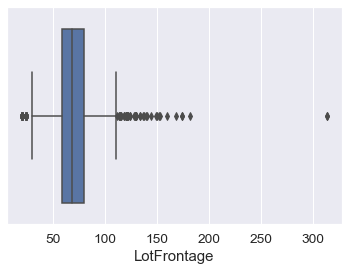

In [225]:
sns.boxplot(housing["LotFrontage"])

In [226]:
housing["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### <font color="red">Inferences-</font>
-  <font color="blue">From the above boxplot, we can clearly make out that distribution of the values is almost constant.Also from the above code we can also tell that mean and median is almost comparable hence we will be taking median value to impute</font>

In [227]:
housing["LotFrontage"].fillna(housing[["LotFrontage"]].median()[0],inplace=True)

# lets check the "GarageType" for nulls value again
housing.isnull()[["LotFrontage"]].sum()

LotFrontage    0
dtype: int64

In [228]:
# 4. checking the "GarageYrBlt" for nulls values
housing[["GarageYrBlt"]].isnull().sum()

GarageYrBlt    81
dtype: int64

<AxesSubplot:xlabel='GarageYrBlt'>

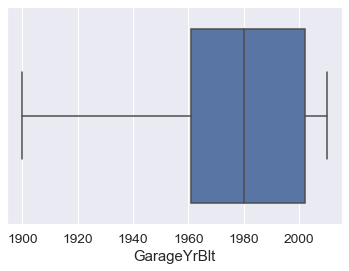

In [229]:
sns.boxplot(housing["GarageYrBlt"])

In [230]:
housing["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

#### <font color="red">Inferences-</font>
-  <font color="blue">From the above boxplot, we can clearly make out that distribution of the values is almost constant.Also from the above code we can also tell that mean and median is almost comparable hence we will be taking median value to impute</font>

In [231]:
housing["GarageYrBlt"].fillna(housing[["GarageYrBlt"]].median()[0],inplace=True)

# lets check the "GarageType" for nulls value again
housing.isnull()[["GarageYrBlt"]].sum()

GarageYrBlt    0
dtype: int64

In [232]:
# 5. checking the "MasVnrArea" for nulls values
housing[["MasVnrArea"]].isnull().sum()

MasVnrArea    8
dtype: int64

<AxesSubplot:xlabel='MasVnrArea'>

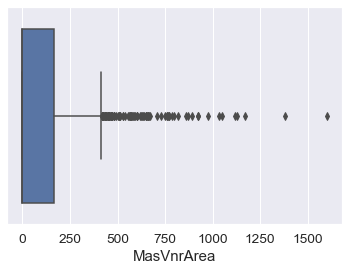

In [233]:
sns.boxplot(housing["MasVnrArea"])

In [234]:
housing["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

#### <font color="red">Inferences-</font>
-  <font color="blue">From the above boxplot, we can clearly make out that distribution of the values is not constant.Also from the above code we can also tell that mean and median is not comparable. hence we will be taking mean value to impute</font>

In [235]:
housing["MasVnrArea"].fillna(housing[["MasVnrArea"]].mean()[0],inplace=True)

# lets check the "GarageType" for nulls value again
housing.isnull()[["MasVnrArea"]].sum()

MasVnrArea    0
dtype: int64

#### Now finally lets check the null values

In [236]:
# Lets check the null count again
(housing.isnull().sum()/len(housing) * 100).sort_values(ascending=False)[:25]

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
BsmtHalfBath     0.0
MSSubClass       0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
dtype: float64

#### <font color="red">Inferences-</font>
-  <font color="blue">We have sucessfully removed all the null values</font>

In [237]:
# Lets do some standardisation
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

# We can see that Id is not required hence removing it
housing.drop(labels="Id",axis=1,inplace=True)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [238]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [239]:
categorical = housing.select_dtypes(include=['object'])
categorical_cols = categorical.columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [240]:
continous = housing.select_dtypes(include=['int64','float64'])
continous_cols = continous.columns
continous_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 2.3 Outlier check

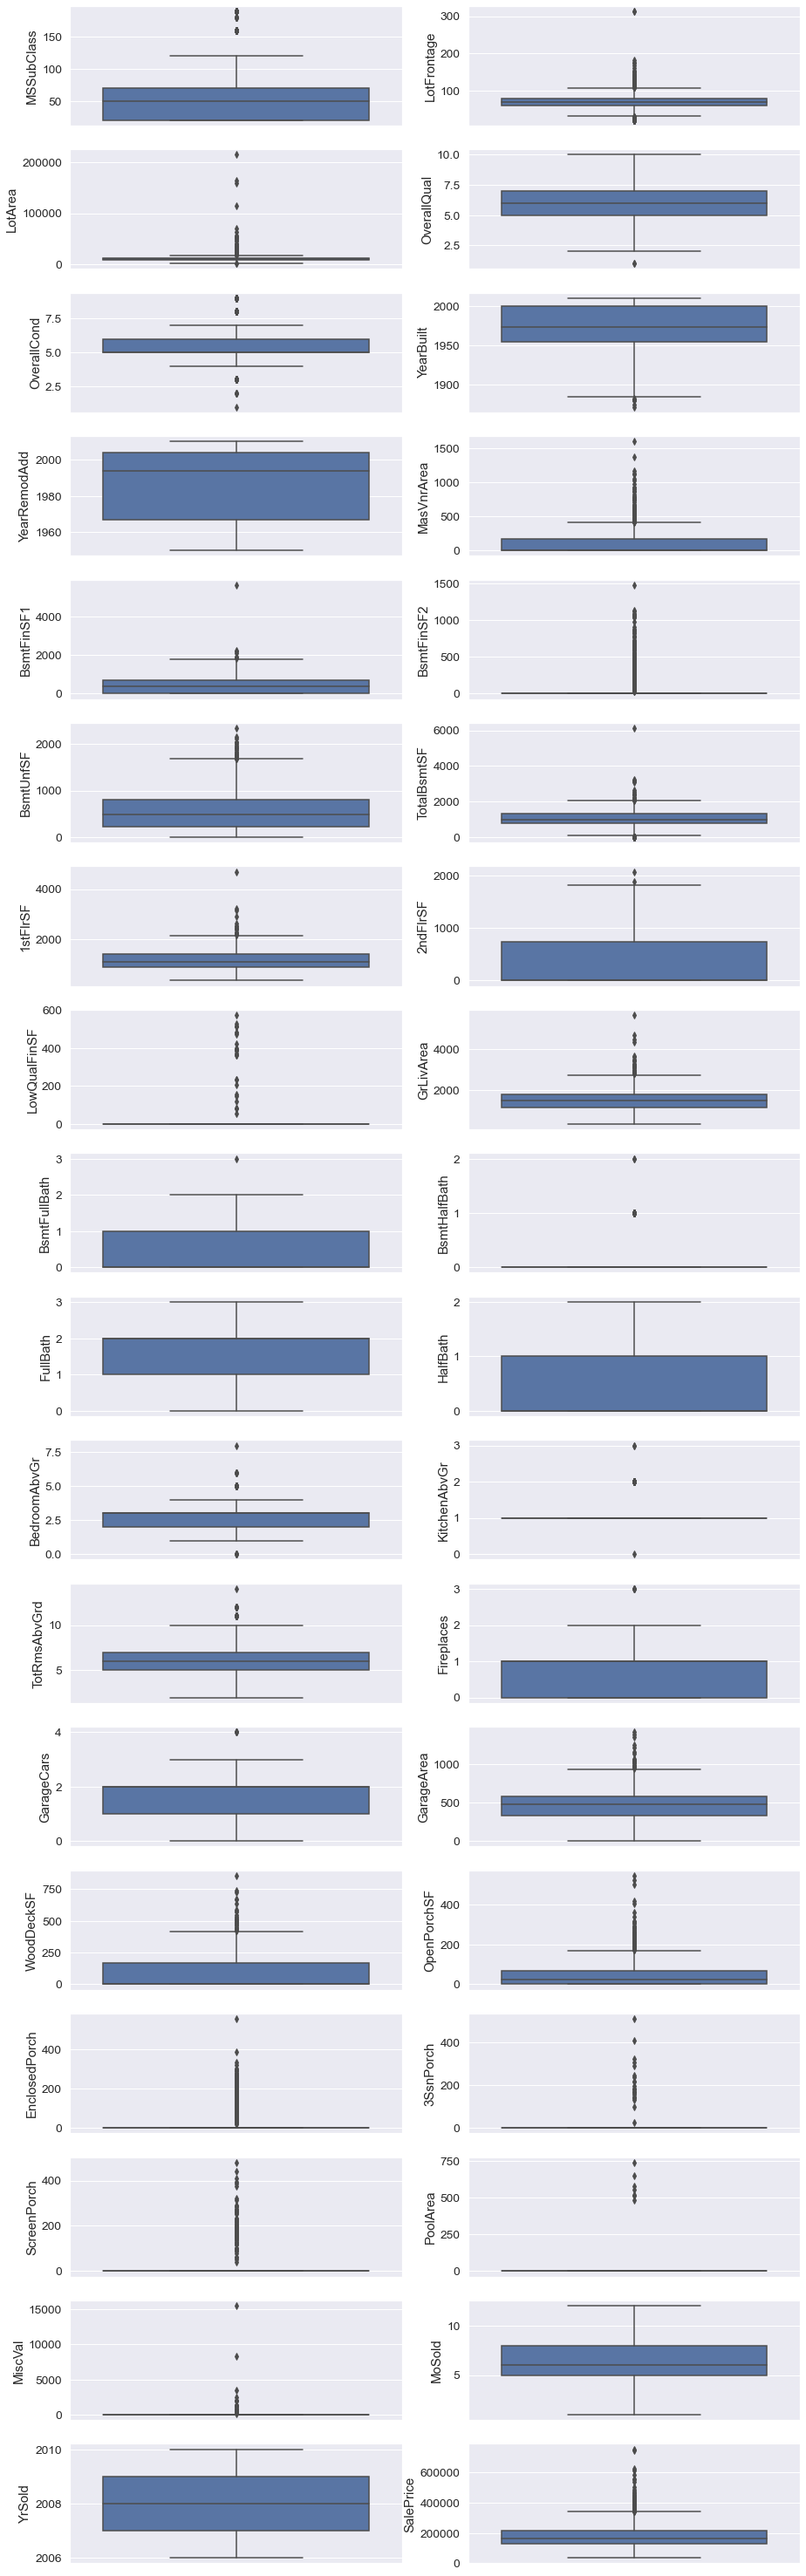

In [241]:
plt.figure(figsize=(15,60))
i = 1
for col in continous_cols:
    plt.subplot(20,2,i)
    sns.boxplot(y=col,data=housing)
    i += 1

#### <font color="red">Inferences-</font>
-  <font color="blue">From the above plots we can say that outlier check looks okay</font>

## 2.4 Perform EDA

### 2.4.1 Univariate Analysis of categorical variable

In [242]:
housing[categorical_cols]

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
0         CollgCr       Norm       Norm  ...      SBrkr          Gd   
1         Veenker      Feedr       Norm  ...      SBrkr          TA   
2         CollgCr       Norm       Norm  ...      SBrkr          Gd   
3         Crawfor       Norm       Norm  ...      SBrkr          Gd   
4         NoRidge       Norm       Norm  ...      SBrkr          Gd   
...           ...        ...        ...  ...        ...         ...   
1455      Gilbert       Norm       Norm  ...      SBrkr          TA   
1456       NWAmes       Norm       Norm  ...      SBrkr          TA   
1457      Crawfor       Norm       Norm  ...      SBrkr          Gd   
1458        NAmes       Norm       Norm  ...      FuseA          Gd   
1459      Edwards       Norm       Norm  ...      SBrkr          TA   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0           Typ     Attchd          RFn         TA         TA          Y   
1           Typ     Attchd          RFn         TA         TA          Y   
2           Typ     Attchd          RFn         TA         TA          Y   
3           Typ     Detchd          Unf         TA         TA          Y   
4           Typ     Attchd          RFn         TA         TA          Y   
...         ...        ...          ...        ...        ...        ...   
1455        Typ     Attchd          RFn         TA         TA          Y   
1456       Min1     Attchd          Unf         TA         TA          Y   
1457        Typ     Attchd          RFn         TA         TA          Y   
1458        Typ     Attchd          Unf         TA         TA          Y   
1459        Typ     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1455       WD        Normal  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  

[1460 rows x 38 columns]

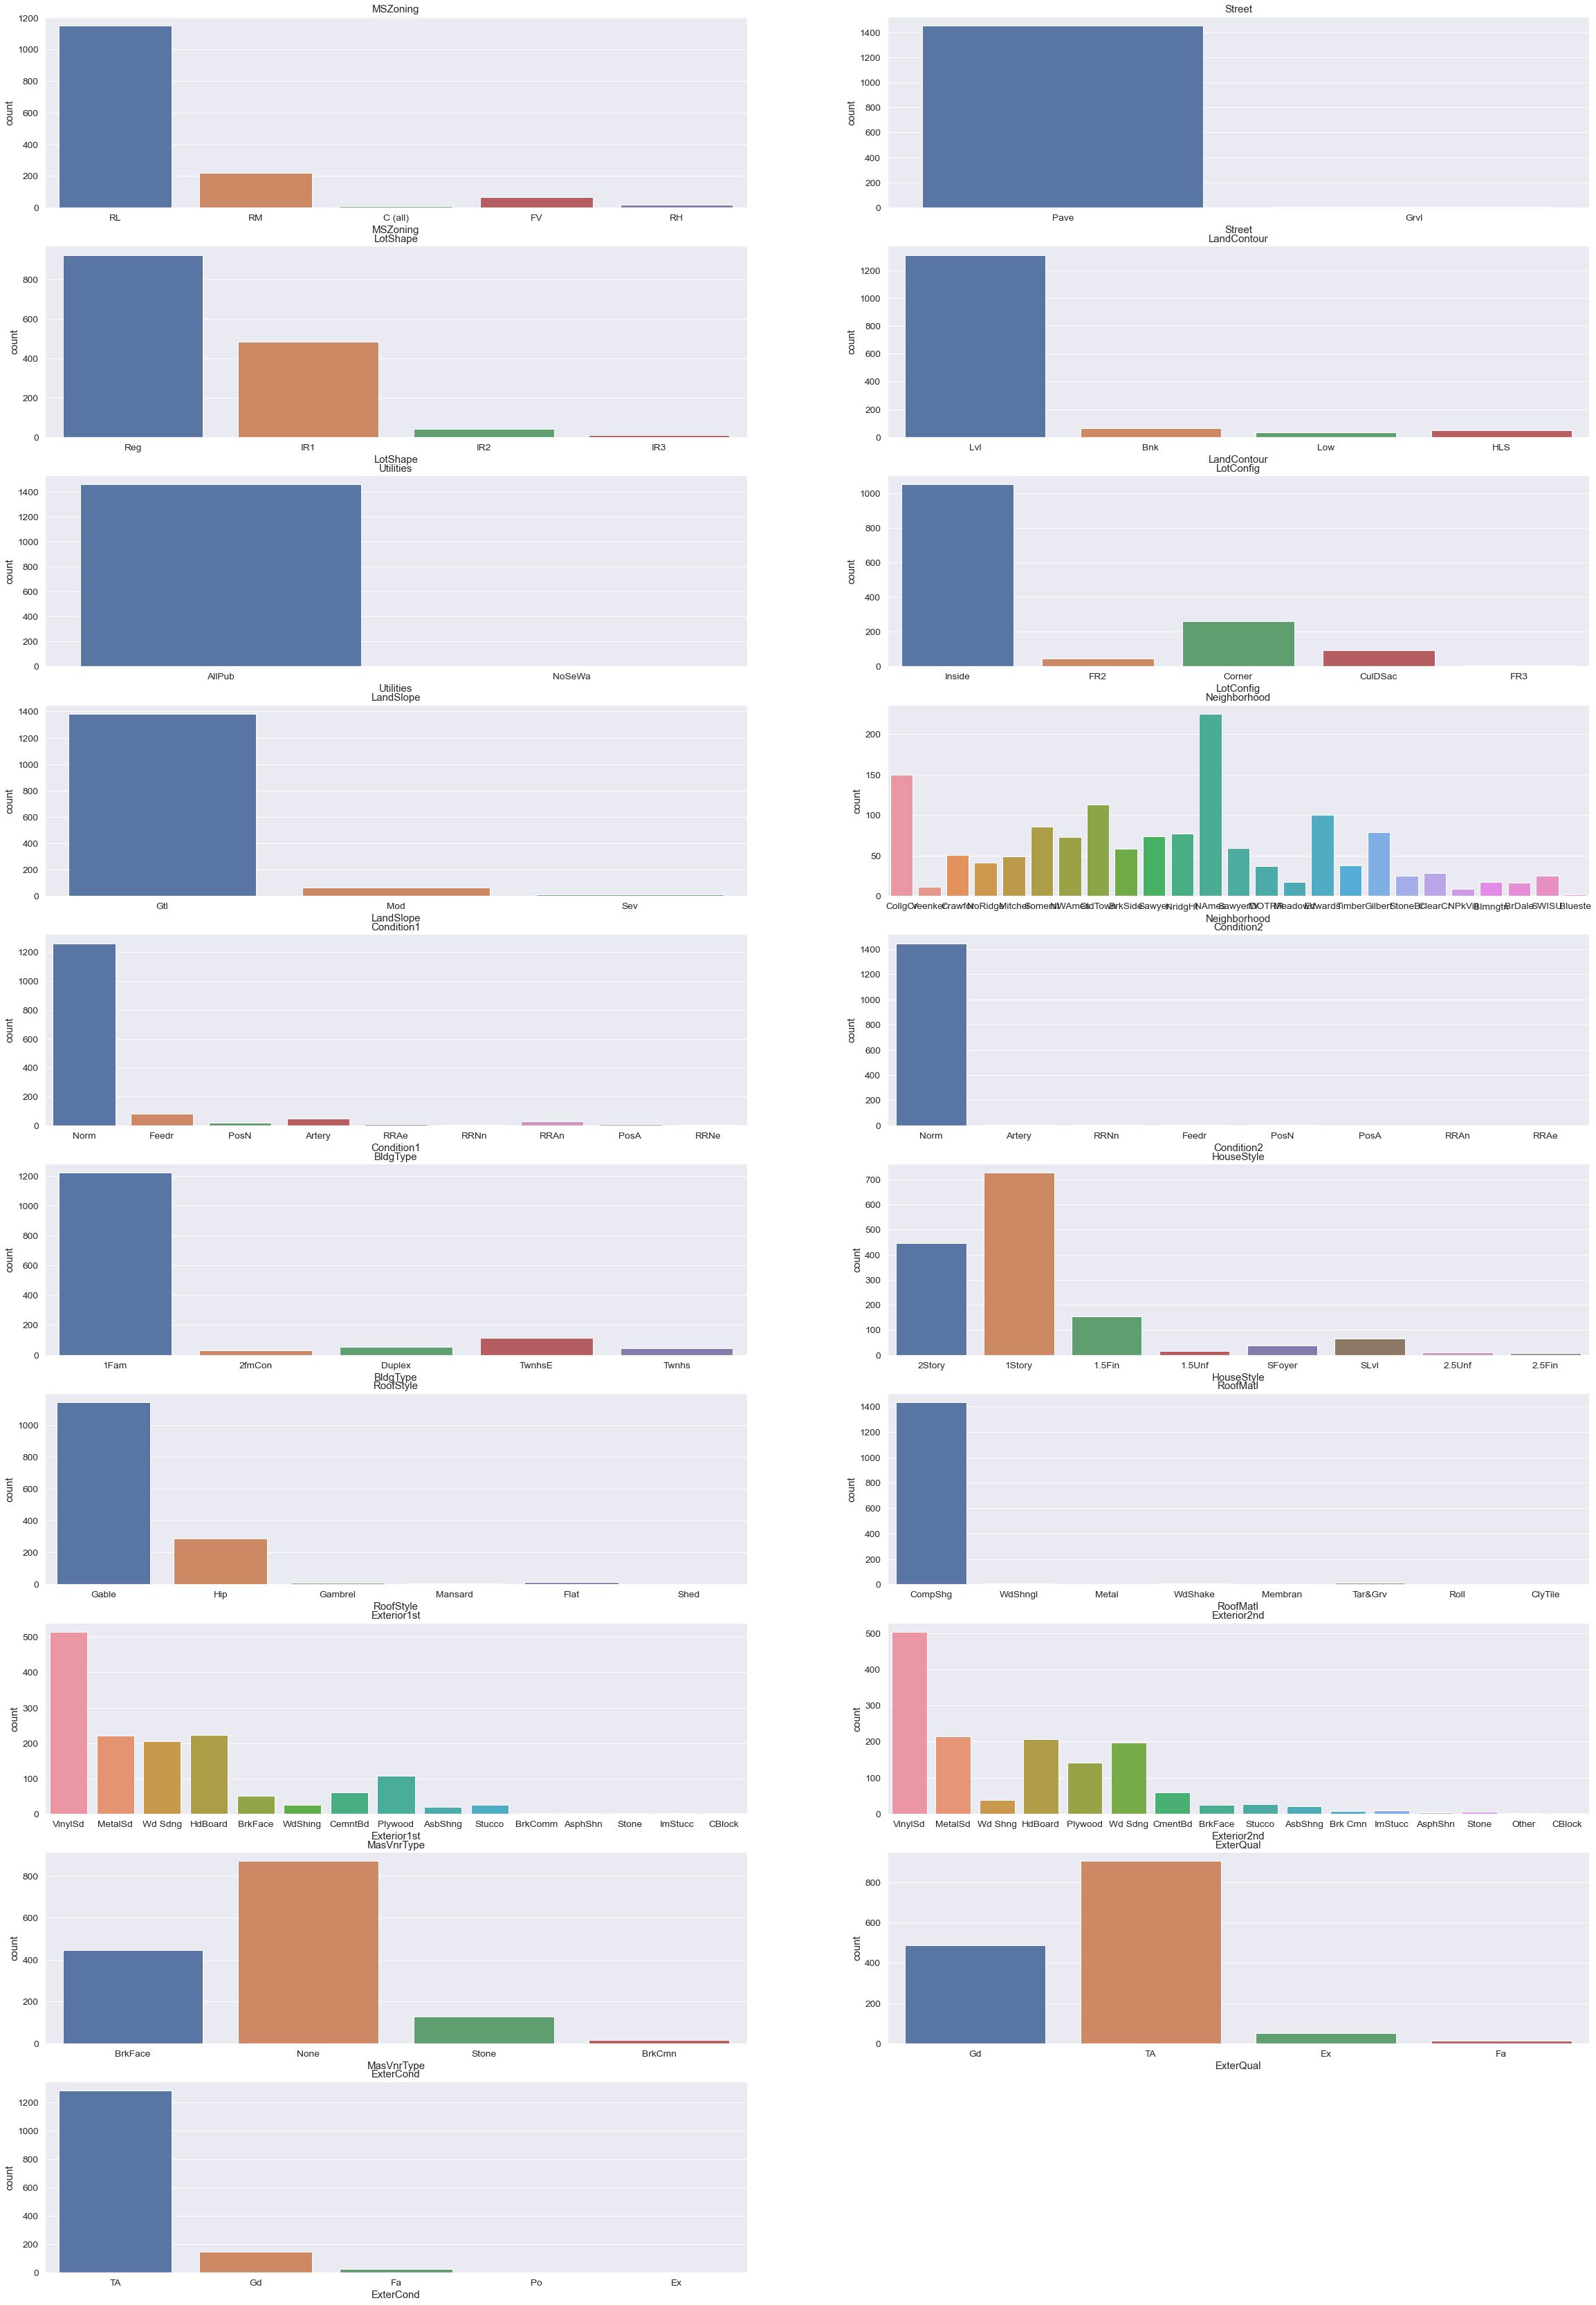

In [243]:
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2', 
 'BldgType', 'HouseStyle','RoofStyle','RoofMatl','Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual','ExterCond'
 ]
plt.figure(figsize = (40,60))

i = 1
for col in cols:
    plt.subplot(10,2,i)
    sns.countplot(housing[col])
    plt.title(col)
    i += 1

#### <font color="red">Inferences-</font>
<font color="blue">From the above plots we can infer the following:-
- There is a maxiumam of Low density followed by medium density residential zones as compared to other zones.
- Most of the houses are connected via paved streets and a hardly few are connected with gravel street
- In the city, most of the Property are of Regular shape sites, and few are Irregular/ couched sites present
- As to have a even site the Contour of the land in the city is almost/ near flat or level compared to any other type of topography
- The city is a well planned one, hence almost every house has All public utilities with all the facilites and there are only few numbered houses with No Sewage conections
- The city has more of Inside plots as compared to corner plots
- As the sites/plots are in the city the landslopes are very gentle/ low with very few to none moderate slopes
- Most houses are located in North Ames and college Creek 
- Most of the houses are connected to normal lanes with few previlaged houses are connected to feeder lanes and arterial lanes
- Almost all of the houses in the city are atleast connected to normal connecting lanes
- Most of the houses are small with a capacity of Single family houses then followedby twin end houses and duplex houses
- Most houses in city are single stored houses followed by 2 and 11.5 stored building respectively
- The houses are built mostly with Gable roof top and then secondly by hip roofs
- Almost all the houses in the city are constructed with Standard (Composite) Shingle roofs
- We can see that the houses exteriors of most of the houses are constructed with Vinyl Siding and we could see a steady decrease in usage of materials usage as metal and wood siding
- Most of the houses are constructed with other method which doesnt use any type of bricks, then most of the houses are built with Brick Face and then comes the stone built houses
- The houses in the city are Average quality houses which are then followed by Good quality built houses which is ranked second</font>

In [244]:
# Dropping highly skewed column 
housing.drop(['Street','Utilities', 'Condition1','Condition2','RoofMatl'],axis=1,inplace=True)
housing.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)
housing.drop(['PavedDrive','BsmtCond'],axis=1,inplace=True)

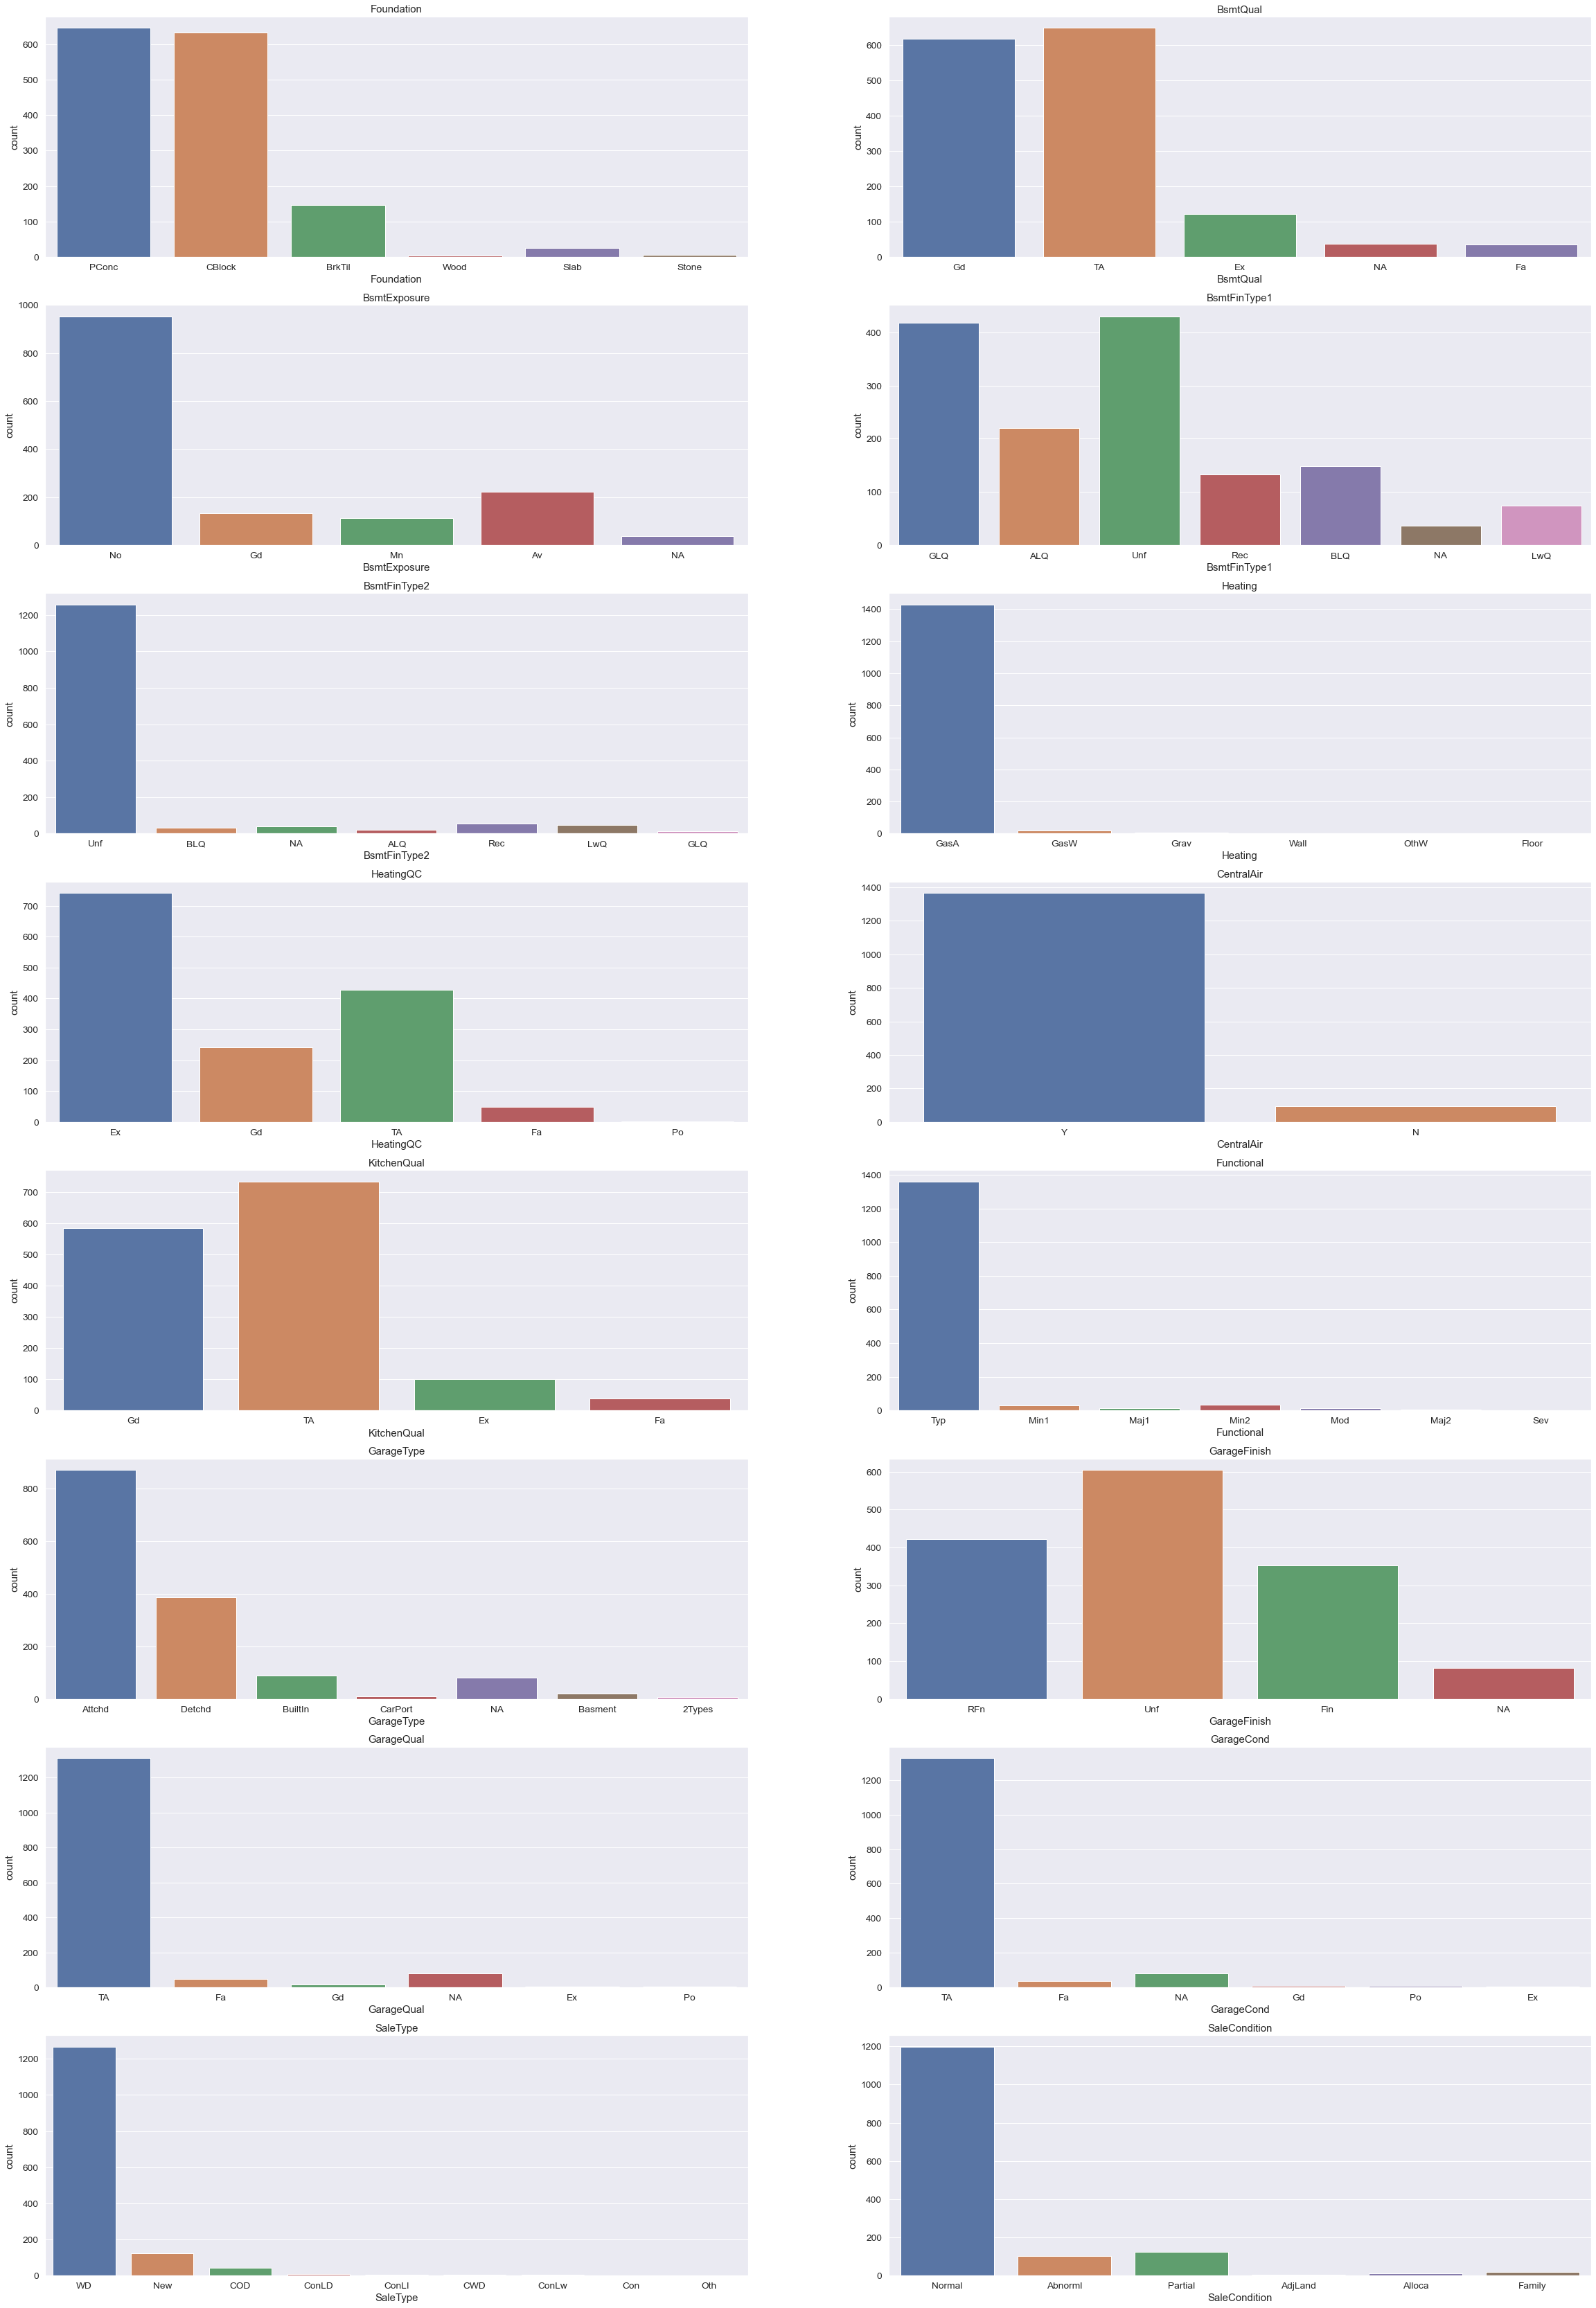

In [245]:
cols = ['Foundation','BsmtQual','BsmtExposure','BsmtFinType1',
 'BsmtFinType2','Heating','HeatingQC','CentralAir',
 'KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
 'GarageCond','SaleType','SaleCondition'
 ]
plt.figure(figsize = (40,60))

i = 1
for col in cols:
    plt.subplot(8,2,i)
    sns.countplot(housing[col])
    plt.title(col)
    i += 1

#### <font color="red">Inferences-</font>
<font color="blue">From the above plots we can say that outlier check looks okay
- We can see that in this group except GarageType and Garage Finsih almost all are skewed so we can drop these columns.
- The city has a maxiumum houses built with Cinder Block and Poured Contrete foundation
- The basement built in the houses in the city are of typical height mostly and with few Good height basements also with a very few Excellent height basement
- The city has houses with almost No outside exposure to average level exposure with good living quaters
- The whole city uses Gas forced warm air furnace heating method
- Most houses are equiped with centralized A/c with very few Non- centralized A/C houses
- Most houses have typical average to good quality kitchen
- Almost every houses are equipedwith typical functionality
- Most houses have a attached garages with some execption of detacted then then followed by Builtin Garages
- Garages in the houses are built unfinished or some are roughly finished and the quality is typical average and almost all the garages in the city are average maintained
- People here prefer to make a sale in Warranty Deed - Conventional as it is the popular one in the city and there happens a normal sale condition
</font>

In [246]:
# Dropping highly skewed column 
housing.drop(['BsmtFinType2','Heating'],axis=1,inplace=True) 
housing.drop(['CentralAir','ExterCond'],axis=1,inplace=True)
housing.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

### 2.4.2 Univariate analysis of Continous variable

In [247]:
continous_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

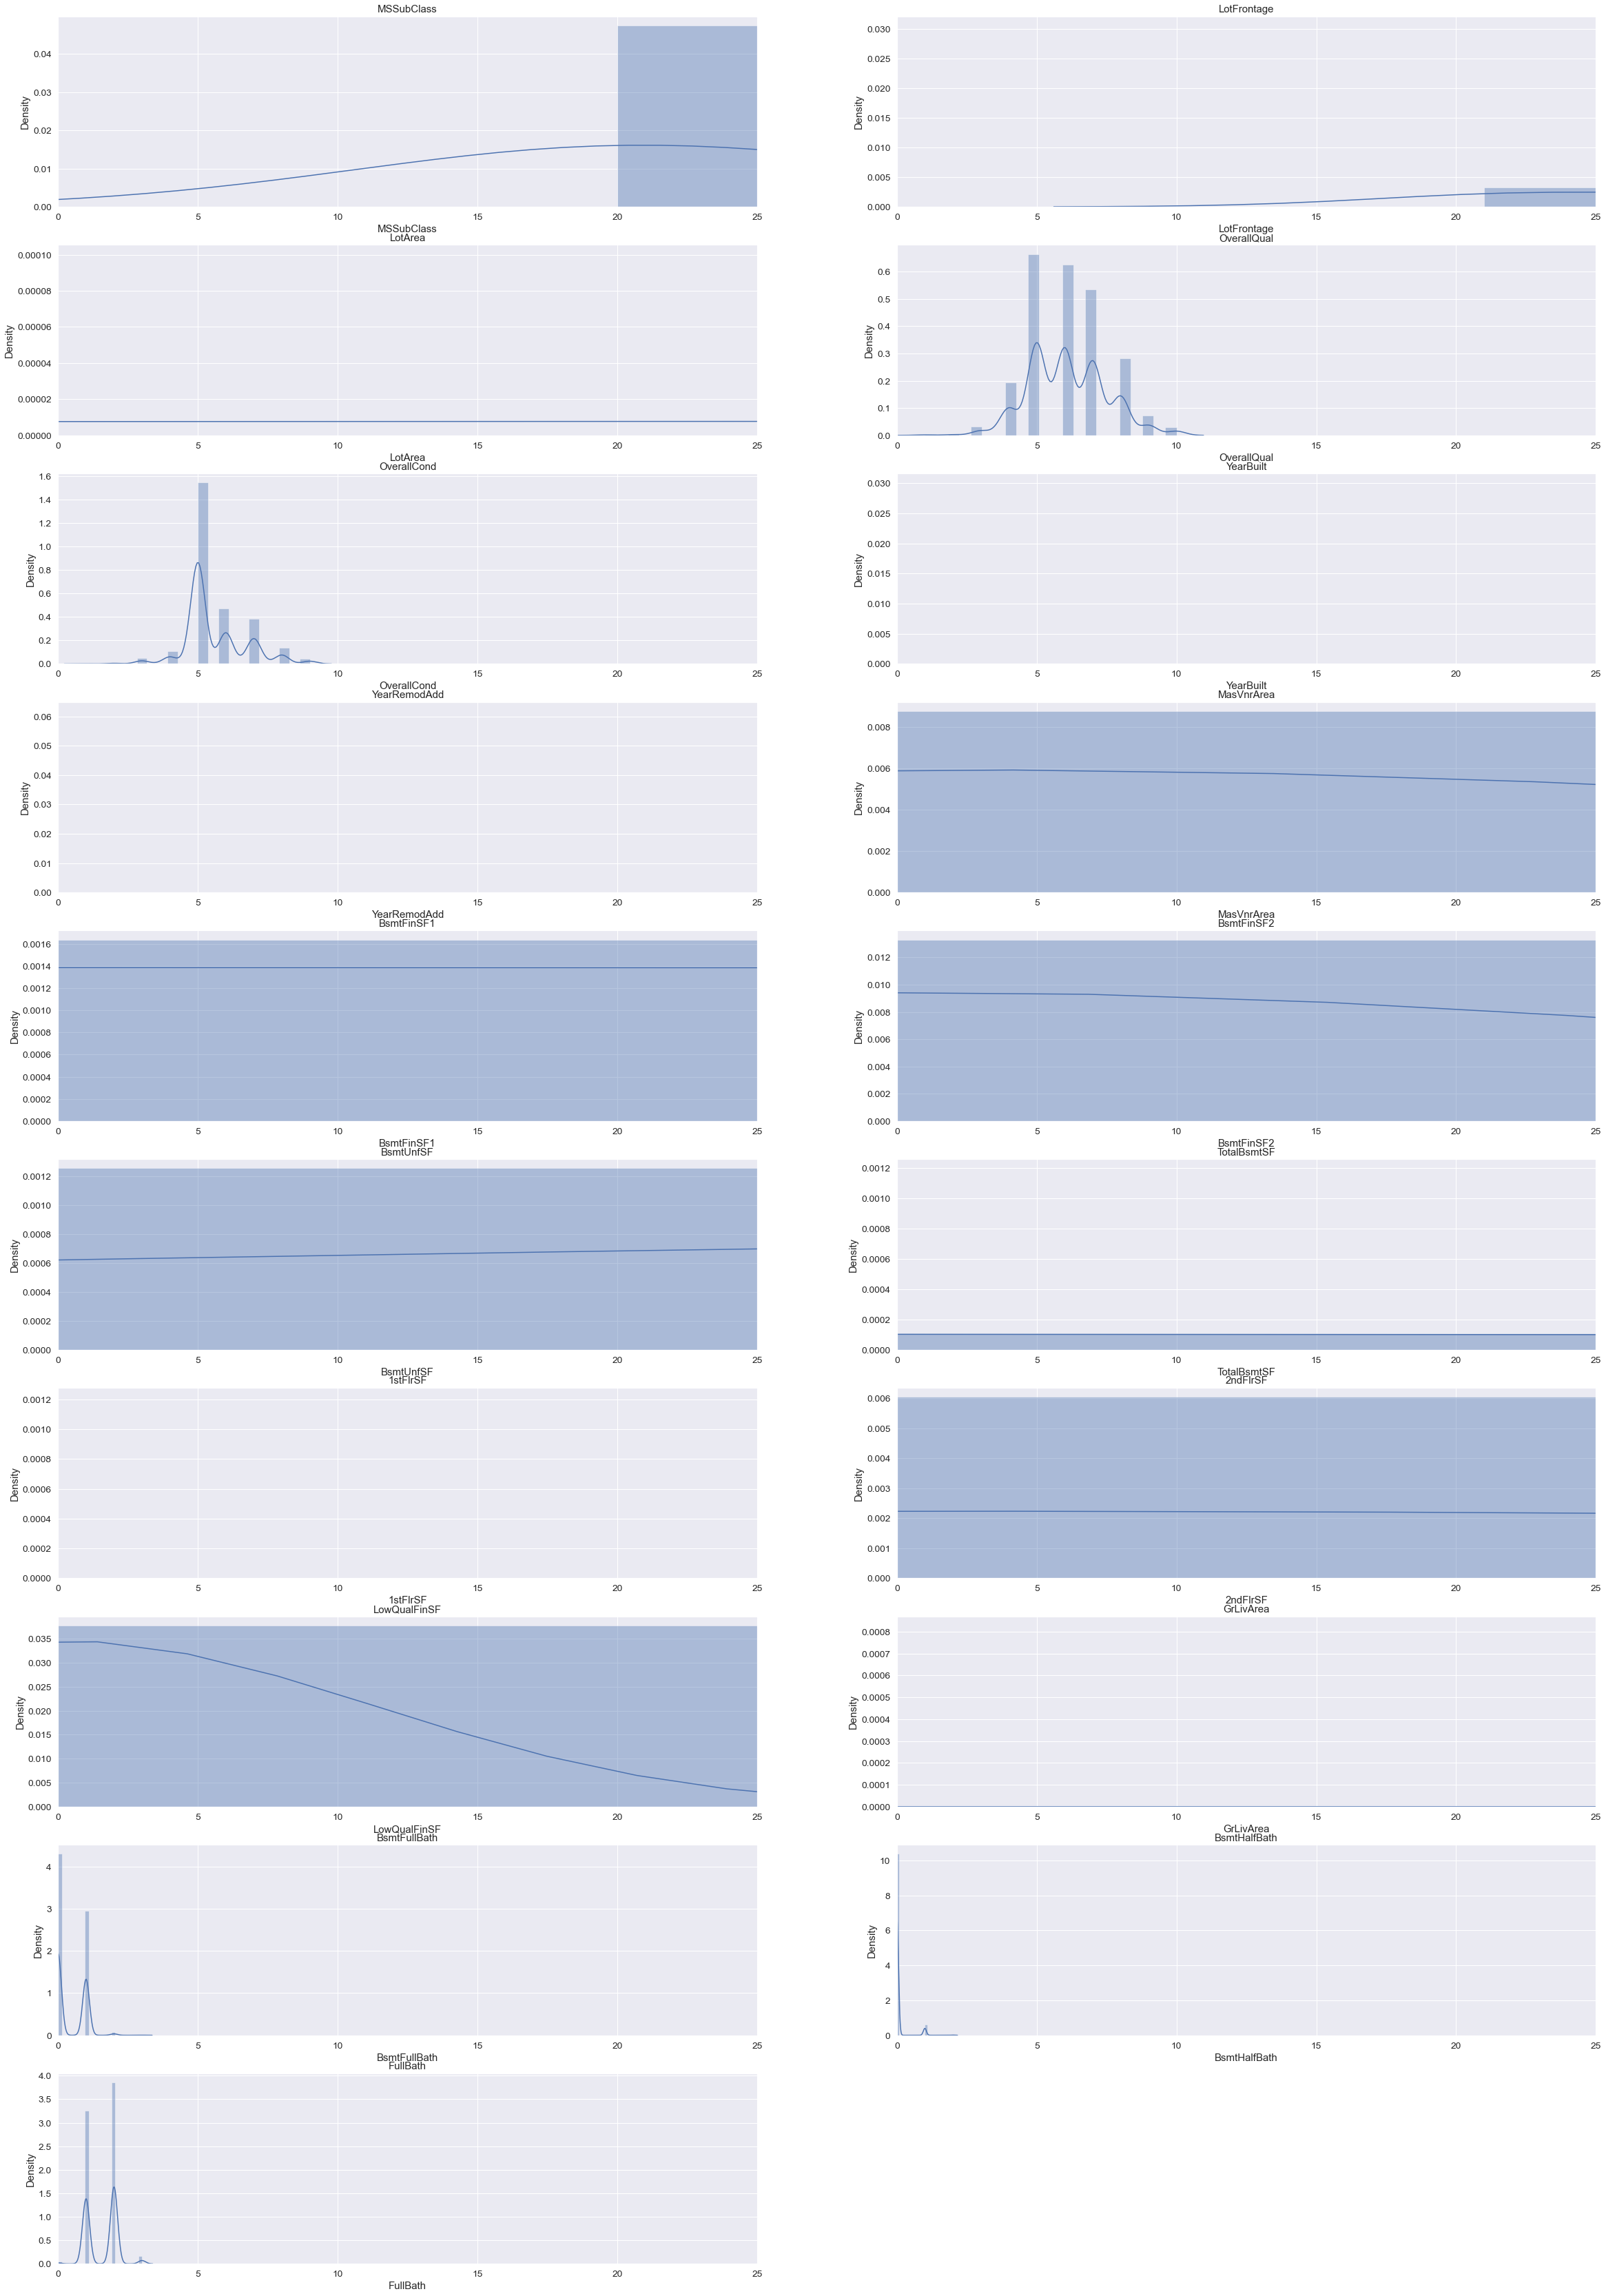

In [248]:
plt.figure(figsize = (40,60))

cols =  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']

i = 1
for col in cols:
    plt.subplot(10,2,i)
    sns.distplot(housing[col],bins = 22)
    plt.title(col)
    plt.xlim(0,25)
    i += 1

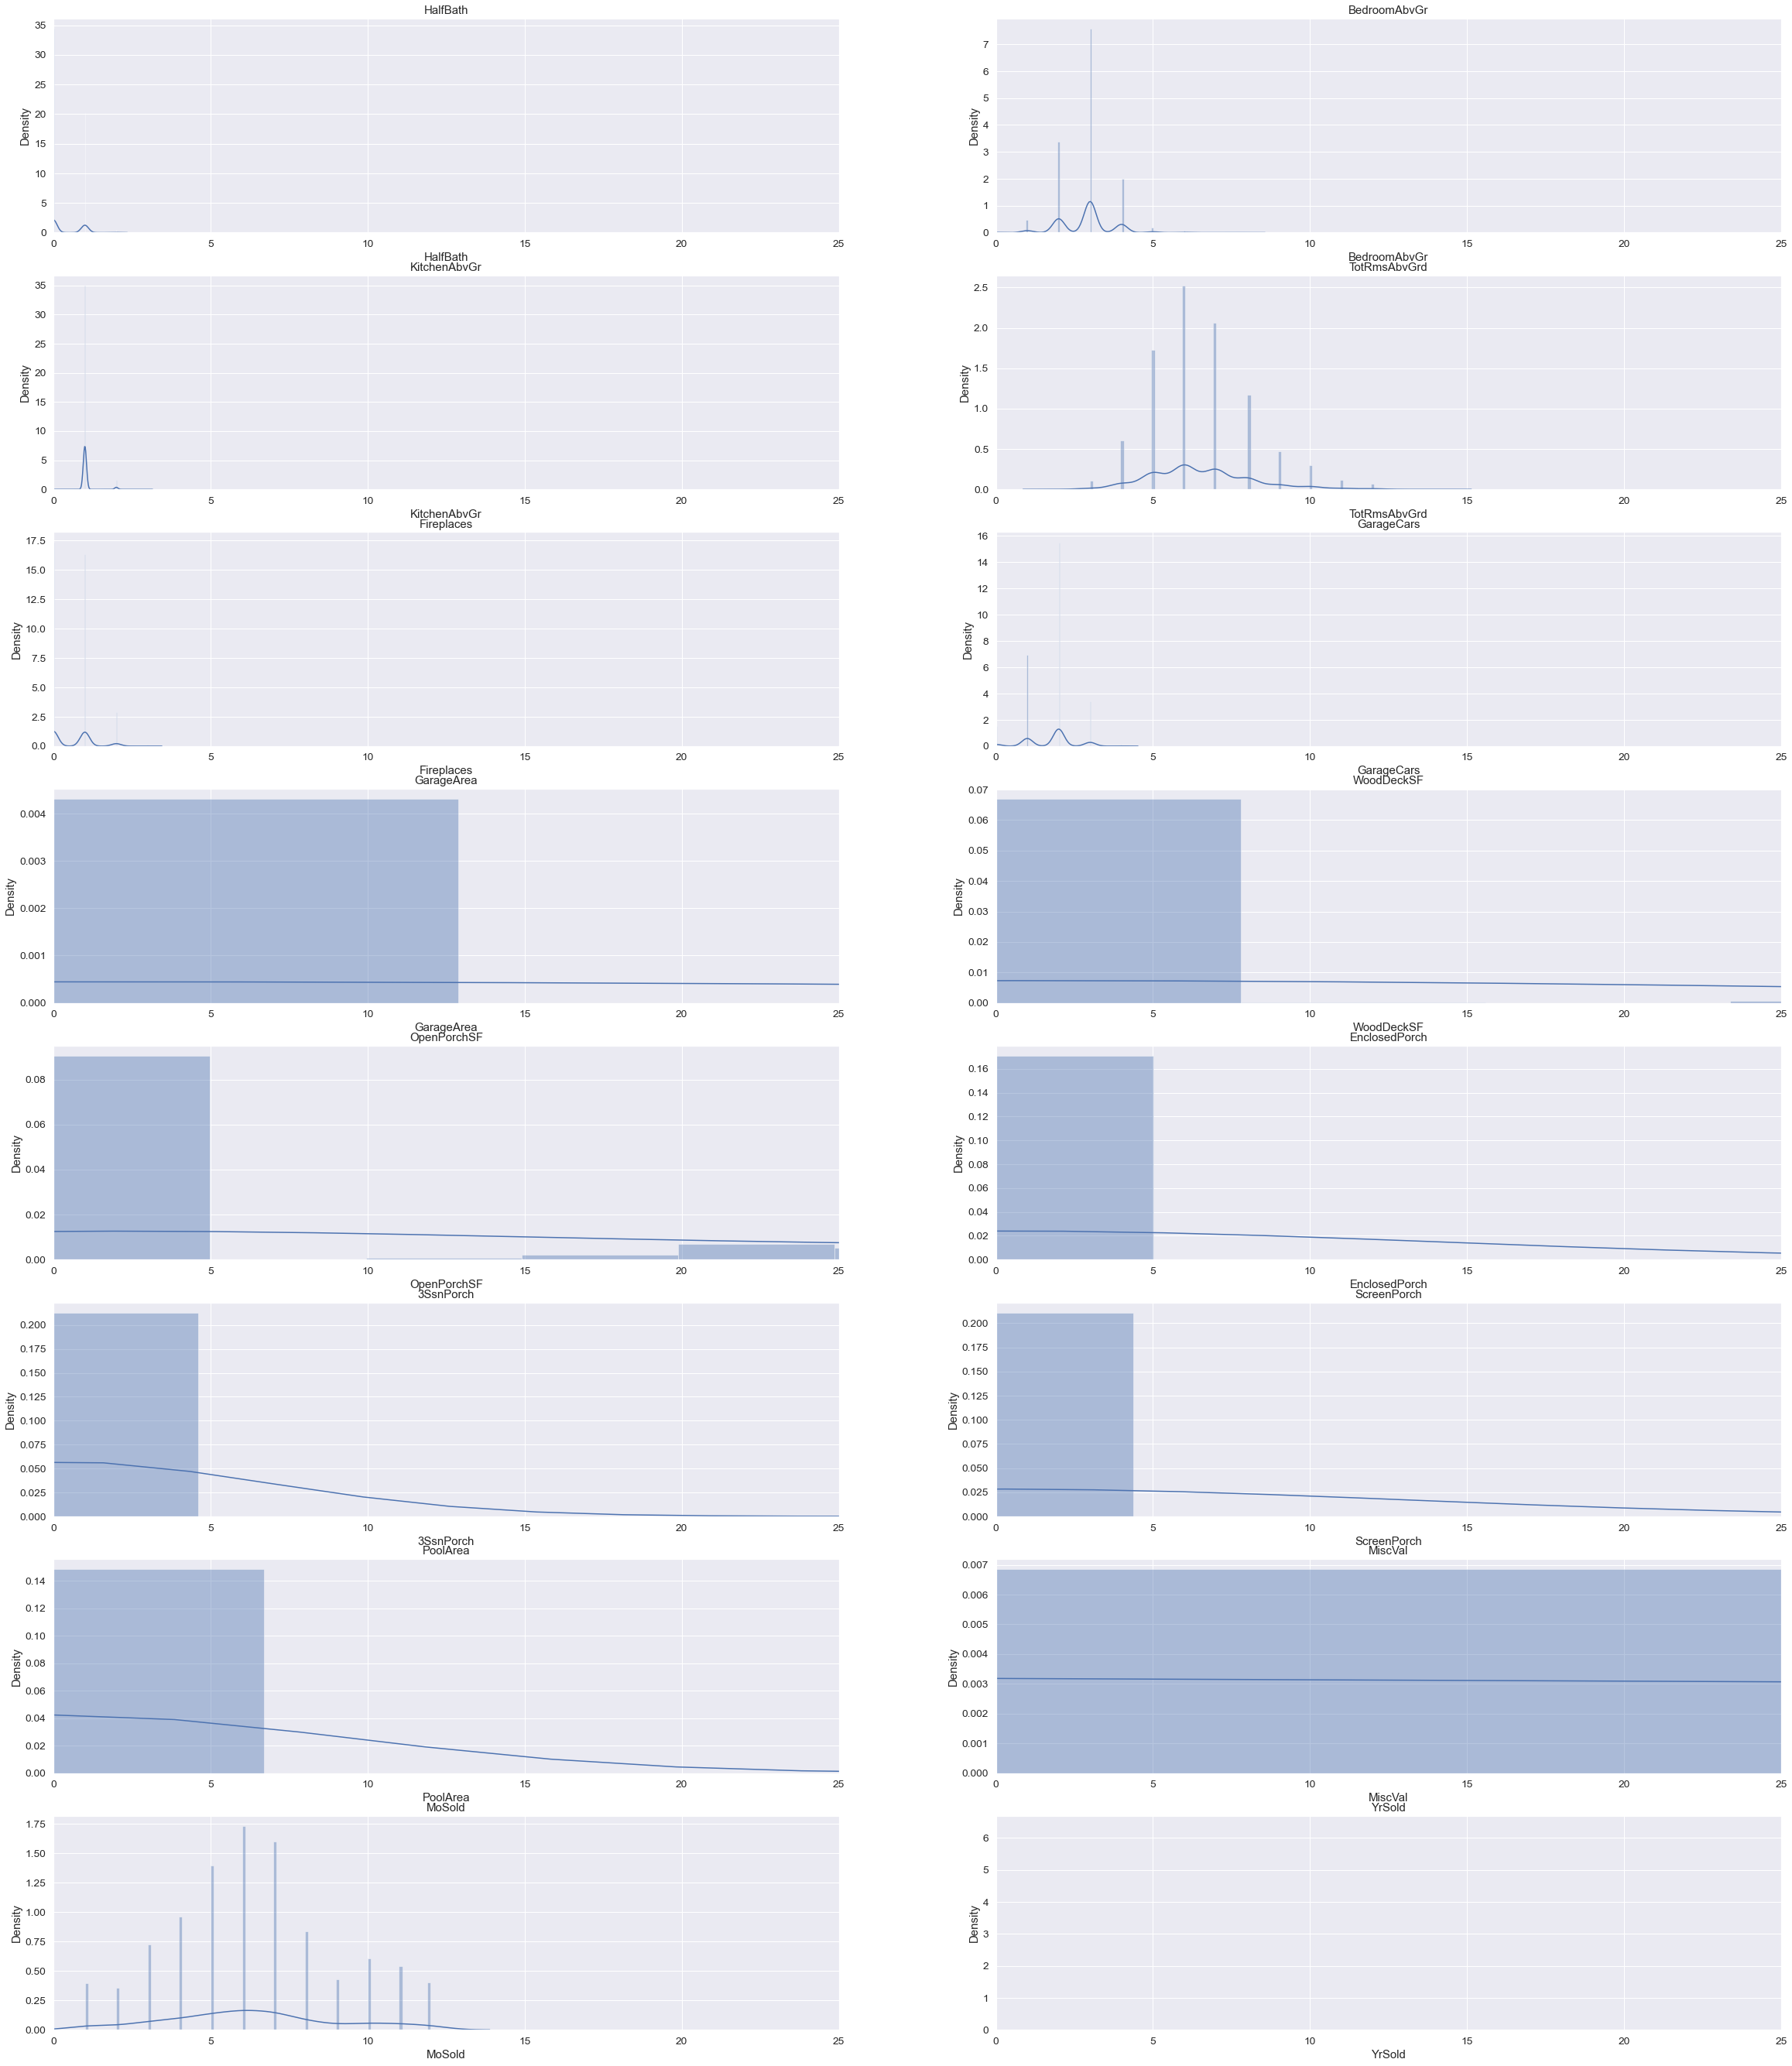

In [249]:
plt.figure(figsize = (40,60))

cols =  ['HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

i = 1
for col in cols:
    plt.subplot(10,2,i)
    sns.distplot(housing[col],bins = 110)
    plt.title(col)
    plt.xlim(0,25)
    i += 1

### 2.4.3 Bivariate analysis with Categorical variables and target variable

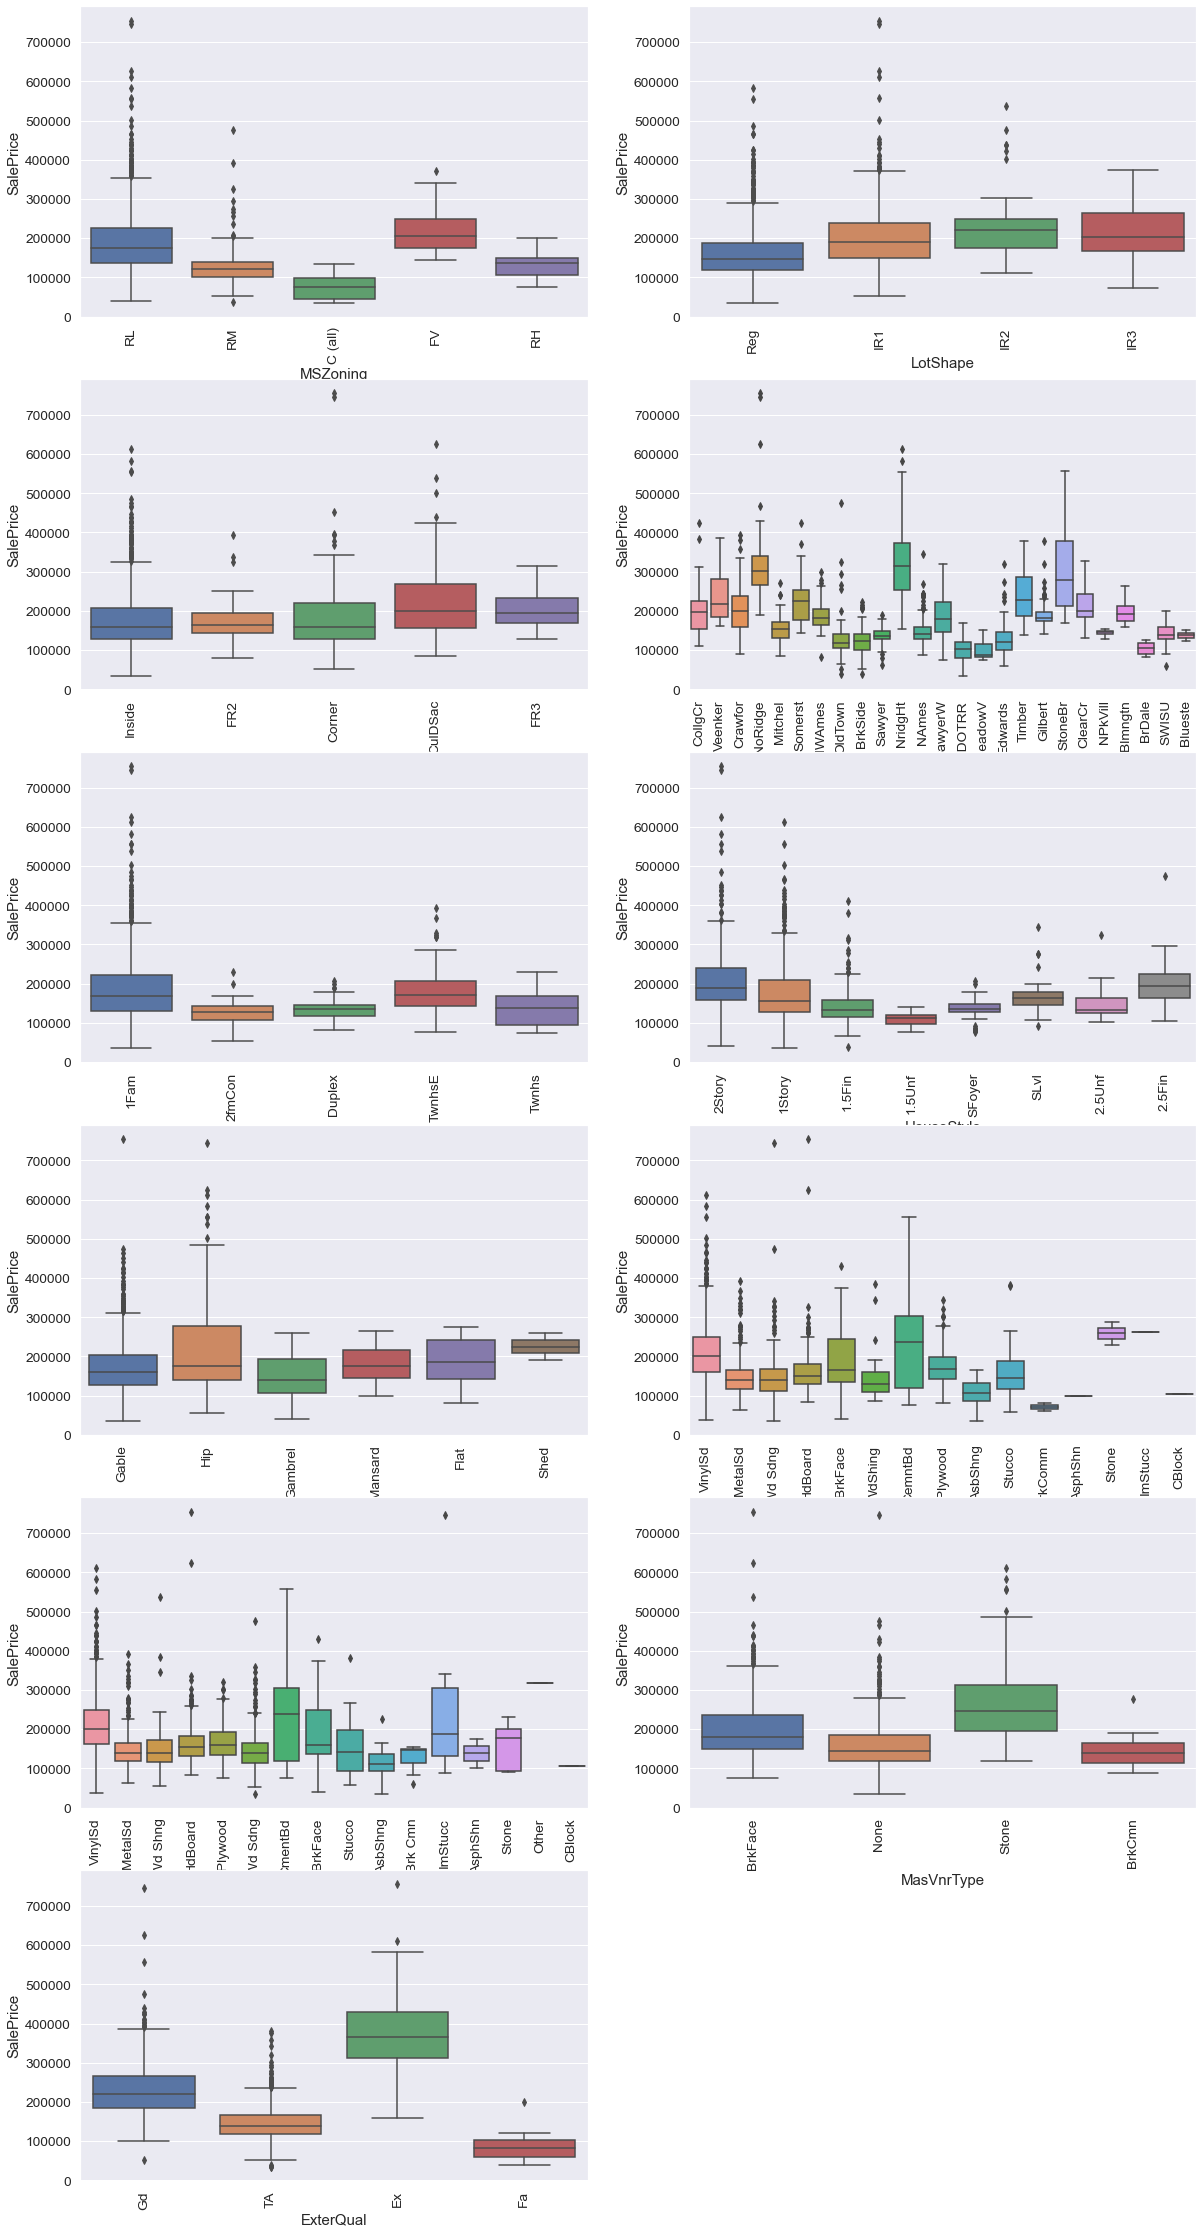

In [250]:
plt.figure(figsize=(20, 40))
cols = ['MSZoning','LotShape',
        'LotConfig','Neighborhood',
        'BldgType','HouseStyle','RoofStyle','Exterior1st',
        'Exterior2nd','MasVnrType','ExterQual']

i = 1
for col in cols:
    plt.subplot(6,2,i)
    sns.boxplot(x = col, y ='SalePrice', data = housing)
    plt.xticks(rotation=90)
    i += 1

#### <font color="red">Inferences</font>
<font color="blue"> 
    
- Even though most hightest sales happen with low residential area and than Floating Village Residential, the Floating Village Residential has the maxiumum averages sale price as compared to any zones
- Maximum sale price happens to have with Irregular shaped sites as compared to Regular ones On an average
- Even though the corner sites have the maxiumum sale price as it is evident but the average sale price is maximum Corner and inside sites
- Highest priced area are nearer to Northridge and Mitchell Roads as compared to any other areas
- Singled familied houses are the most priced housed as the families are in dier need of privacy
- 2 story and single stored houses are the most priced and sold houses in the city
- Hip style and Gable styled roof has the maximum price, with Vinyl siding exteriors
- Astoninshingly, Cement bed exteriors also are sold very high priced
- Houses with Brick faced masnory veener houses are sold at the highest price and also it is evident that excelent quality exteriors are the most priced houses too!!
</font>

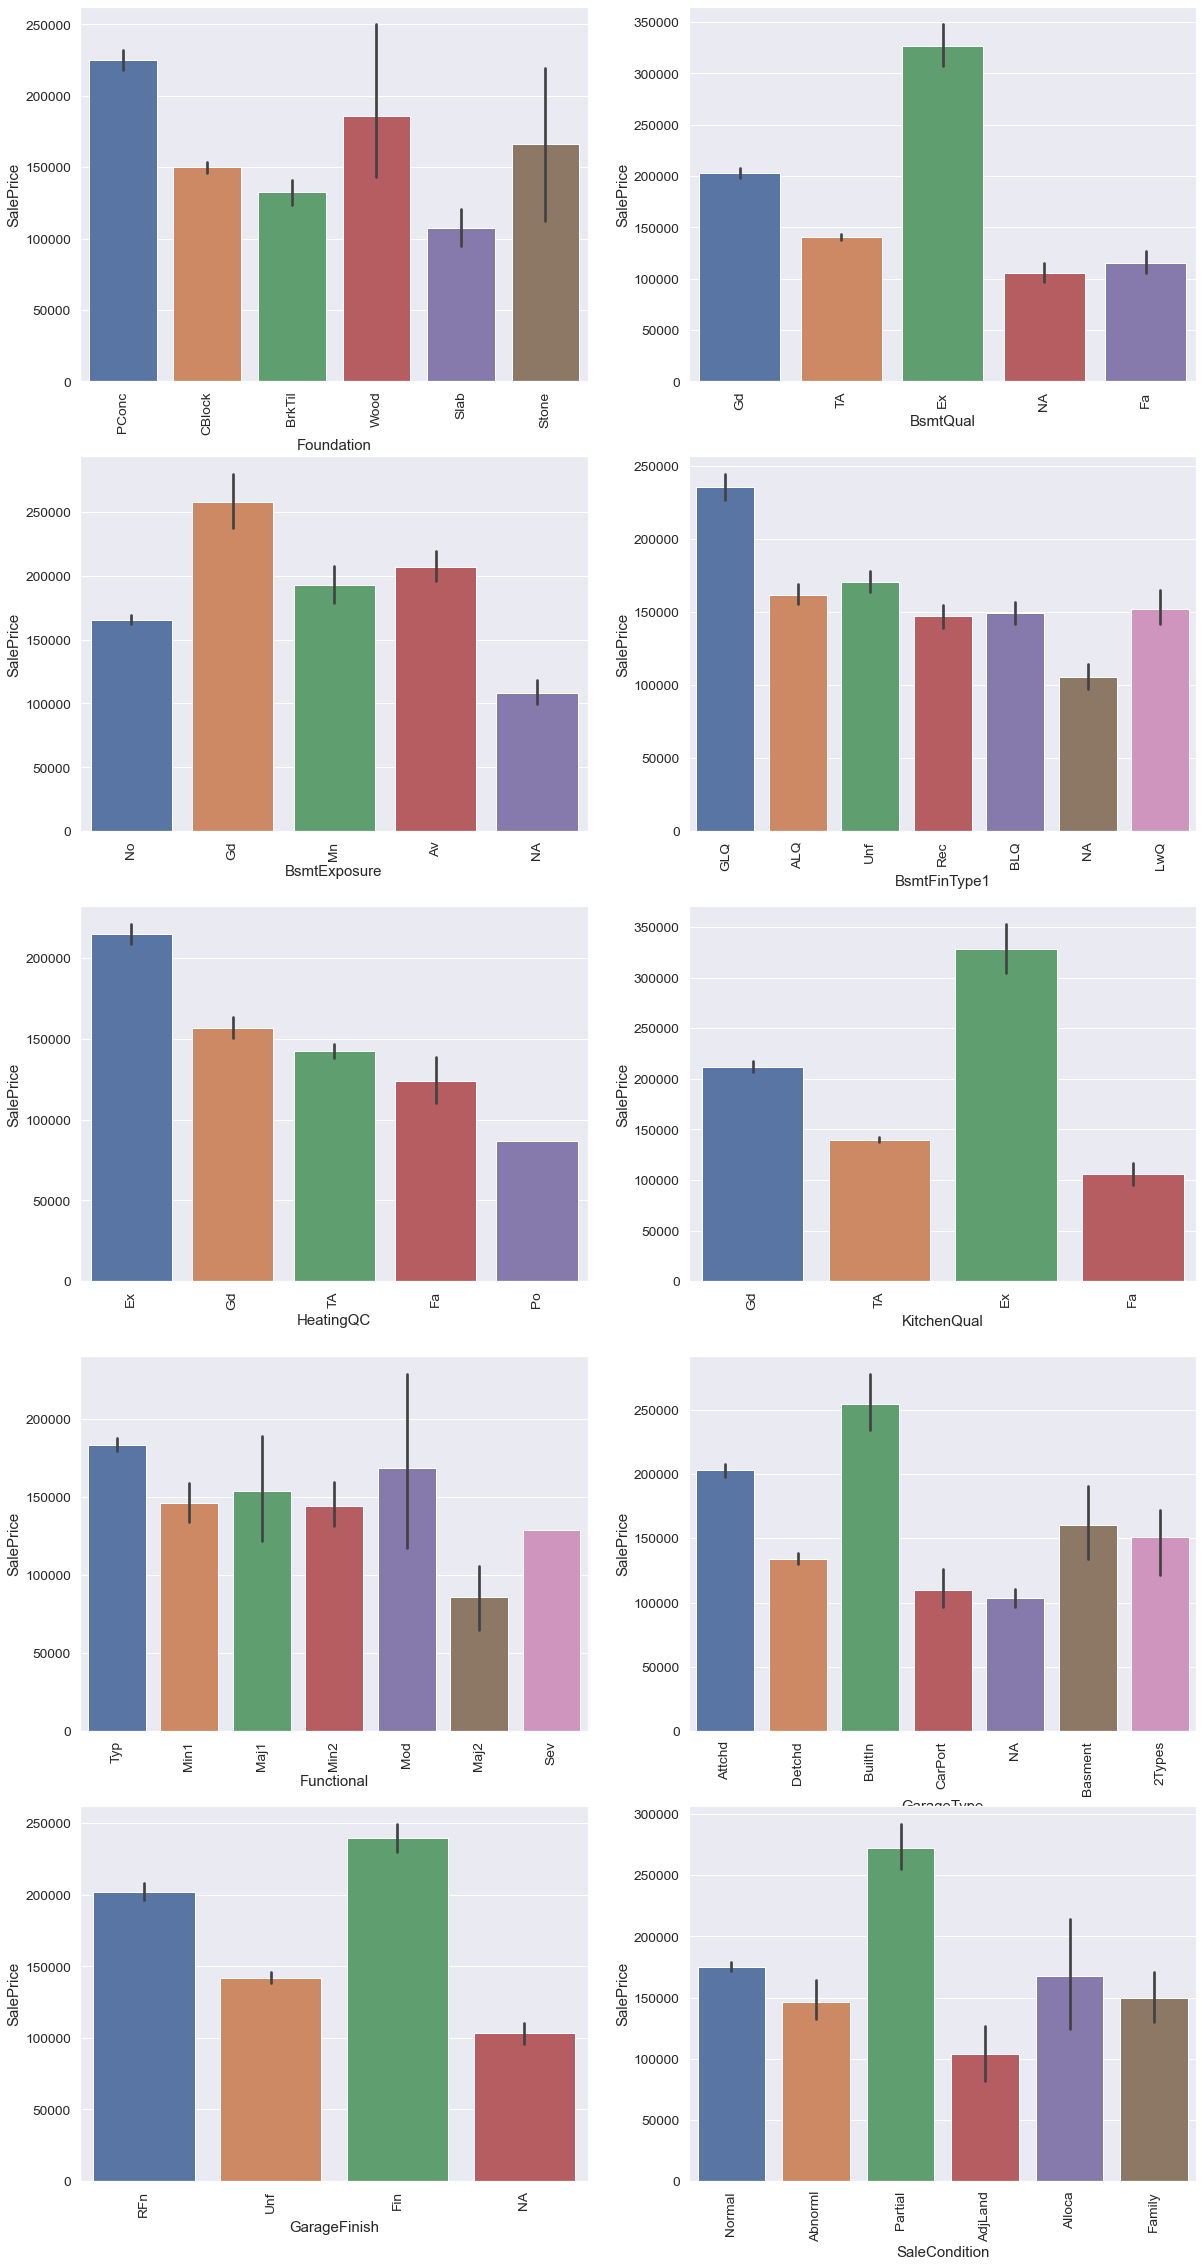

In [251]:
plt.figure(figsize=(20, 40))
cols = ['Foundation','BsmtQual','BsmtExposure',
 'BsmtFinType1','HeatingQC'
 ,'KitchenQual','Functional','GarageType','GarageFinish','SaleCondition']

i = 1
for col in cols:
    plt.subplot(5,2,i)
    sns.barplot(x = col, y ='SalePrice', data = housing)
    plt.xticks(rotation=90)
    i += 1

#### <font color="red">Inferences-</font>
<font color="blue">
    
- Poured Contrete foundation has the maximum price as the strength baring of concrete is higher than anything on the list. This Price is then followed by Stone and Wood basemant foundations which are conventional ways of building
- The price of he house increases with increase in high of basement. Hence the excellent height basement has the highest price in the market
- Obiously well lit basement has very high cost so the finished rating of the same
- As the city is near to northern hemisphere it is required to have the best heating system installed in the house during winters. Hence excellent quality heater installed houses cost the most then follows the good and moderate heaters
- It is obious to have highest price to those houses with excellent kitchen quality
- People are not that used to technology, hence moderate functionality equiped houses are the most priced ones
- People prefer to have builtin and attached garages more are they are the most costly ones in the city which is then followed by detacted/ separate garages
- It is so obious that fully furnished garages are the most expensive ones which are next followed by roughly furnished ones
- Partial condition houses are the most salepriced houses in the city  
</font>

### 2.4.4 Bivariate analysis with Continous variables and target variable

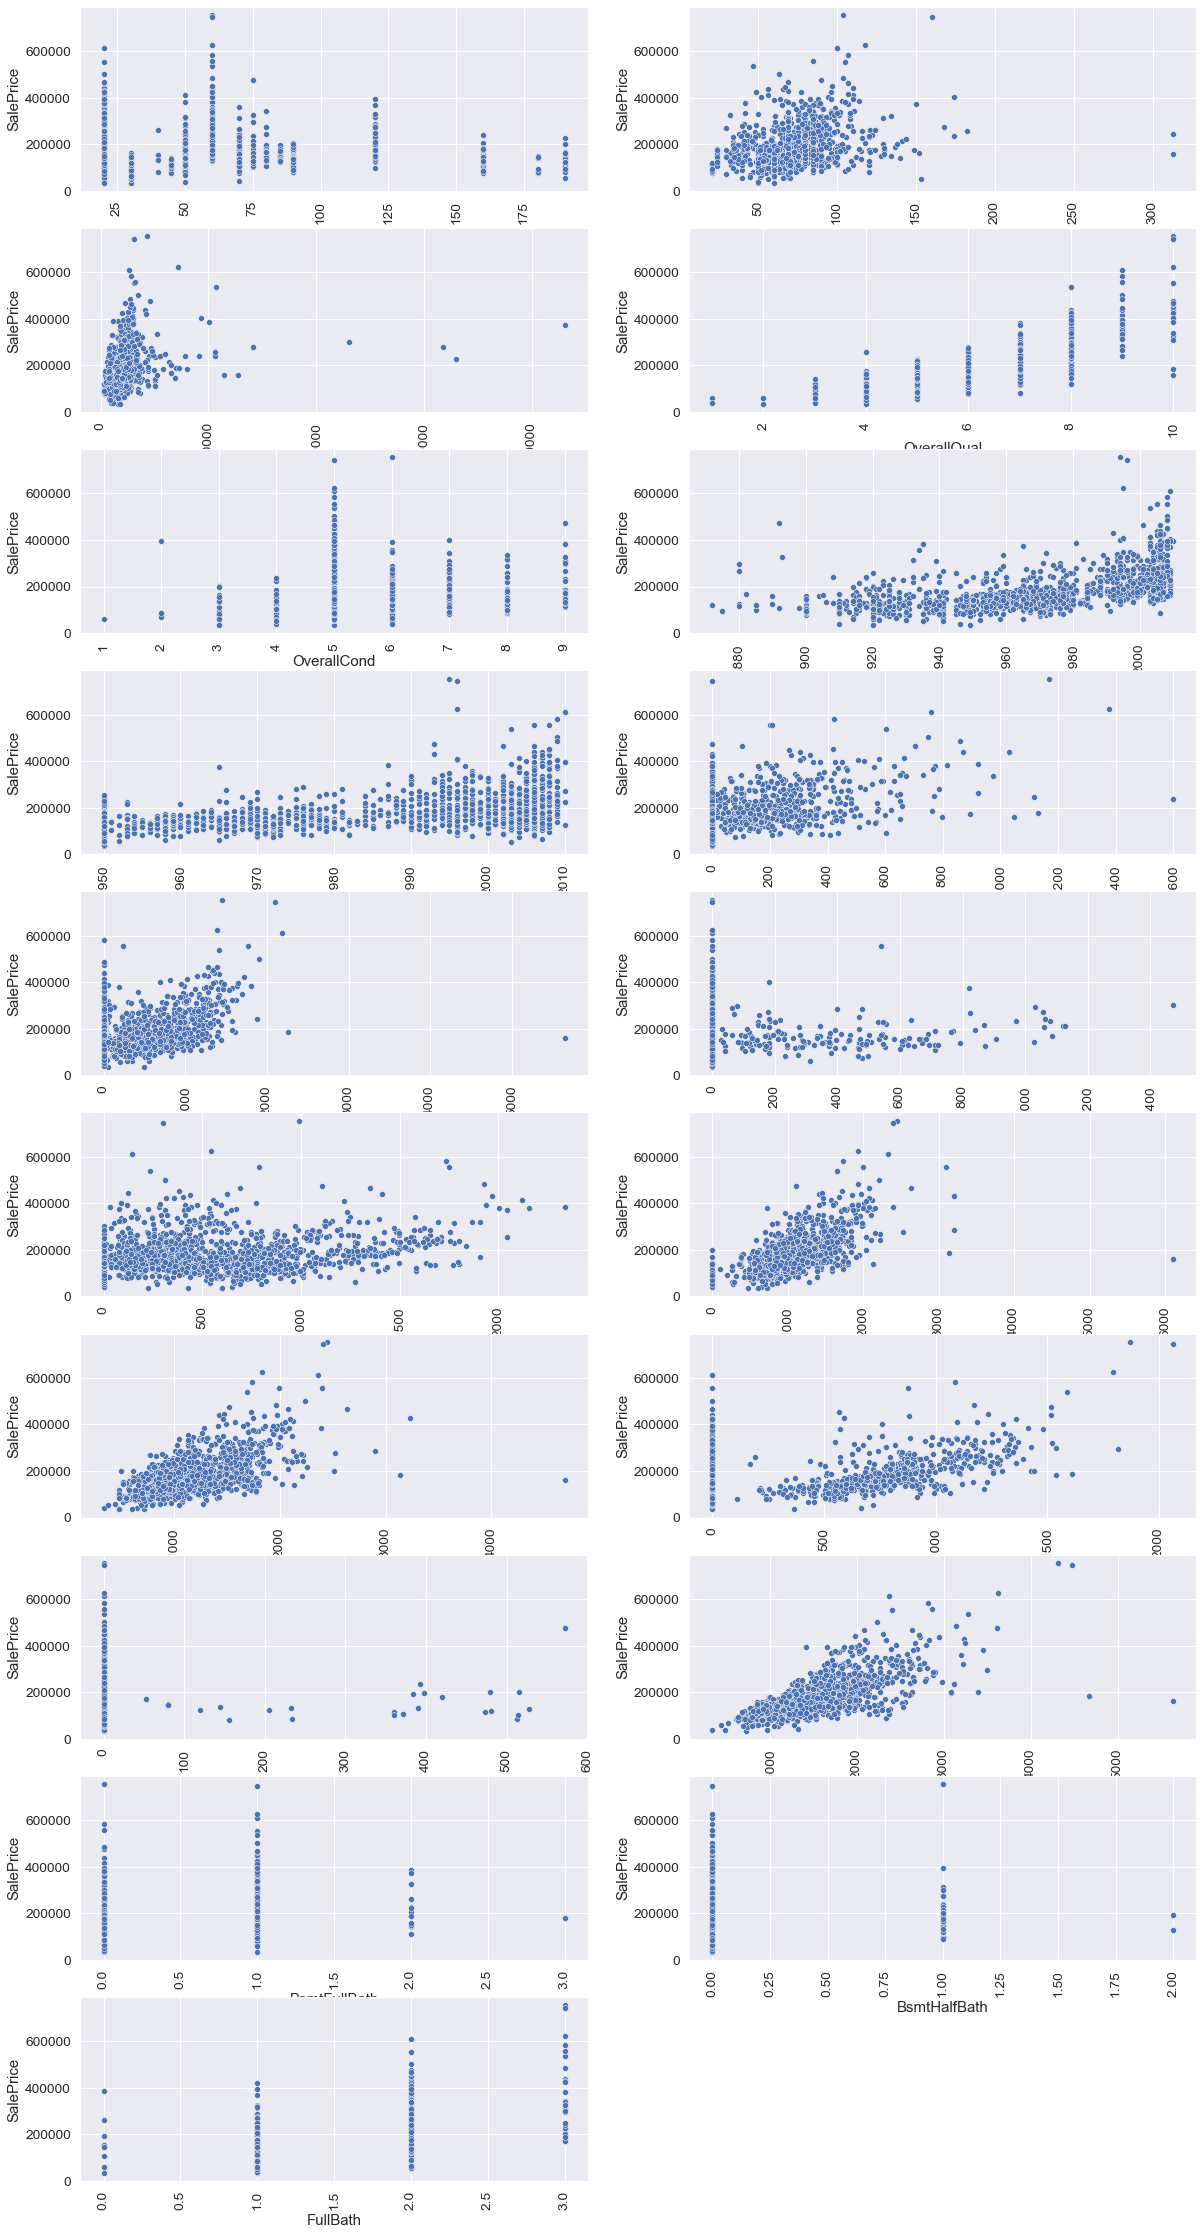

In [252]:
plt.figure(figsize=(20, 40))
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']

i = 1
for col in cols:
    plt.subplot(10,2,i)
    sns.scatterplot(x = col, y ='SalePrice', data = housing)
    plt.xticks(rotation=90)
    i += 1

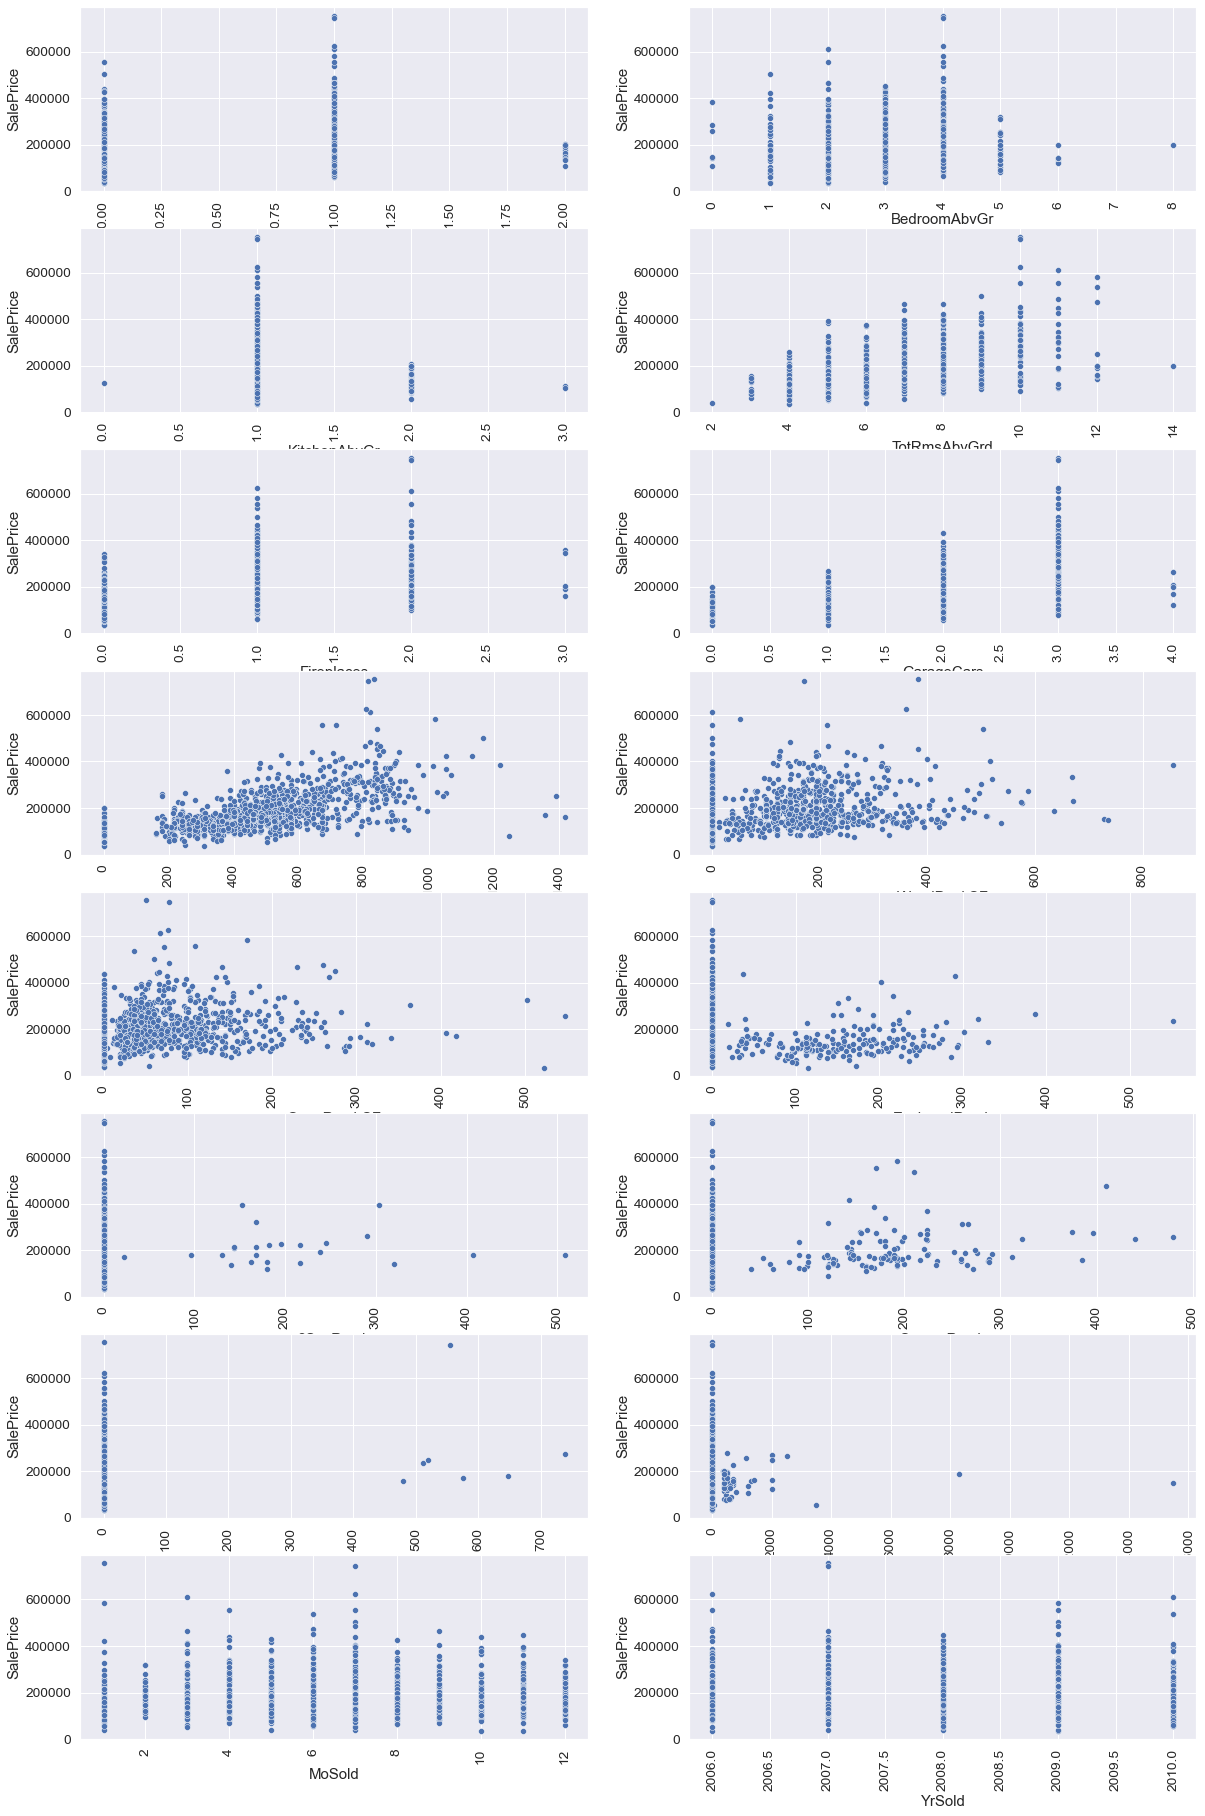

In [253]:
plt.figure(figsize=(20, 40))
cols = ['HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

i = 1
for col in cols:
    plt.subplot(10,2,i)
    sns.scatterplot(x = col, y ='SalePrice', data = housing)
    plt.xticks(rotation=90)
    i += 1

#### <font color="red">Inferences-</font> 
<font color="blue">From the above plots we can say that,

- Linear feet of street connected to property,
Lot size in square feet,
Rates the overall material and finish of the house,
Original construction date,
Remodel date (same as construction date if no remodeling or additions),
Masonry veneer area in square feet,
Type 1 finished square feet,
Type 2 finished square feet,
Unfinished square feet of basement area,
Total square feet of basement area,
First Floor square feet,
Second floor square feet,
Low quality finished square feet (all floors),
 Above grade (ground) living area square feet,
Number of fireplaces,
Wood deck area in square feet,
Open porch area in square feet,
Enclosed porch area in square feet,
Three season porch area in square feet,
Screen porch area in square feet,
Pool area in square feet,
$Value of miscellaneous feature are all are linearlly increasing with Sale price.
- The type of dwelling used in the sale are having linearly decreasing trend with sale price
</font>

### 2.4.6 Standardizing the values and checking for skewness

__From the above plots we are going to check for the skewness of the data columns and drop those columns which are highly skewed__

In [254]:
print(housing['GarageType'].value_counts())
print()
print(housing['SaleCondition'].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [255]:
housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

In [256]:
housing.shape

(1460, 58)

In [257]:
#Lets check the value_counts of check of skweness
print(housing['Foundation'].value_counts())
print()
print(housing['MSZoning'].value_counts())

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [258]:
housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')
housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

In [259]:
print(housing['Exterior2nd'].value_counts()) #similarly we checking the skewness for other columns
#Lets check the value_counts of check of skweness
print()
print(housing['HouseStyle'].value_counts())
print()
print(housing['RoofStyle'].value_counts())
print()
print(housing['Exterior1st'].value_counts())

# We can see that there are few values which are occuring very less hence, we will be converting it into other
housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


### 2.5 Derived Features

In [260]:
#Getting the age of the houses by creating the Age column
housing['CurrentYear'] = datetime.datetime.now().year
housing["Age"] = housing['CurrentYear'] - housing['YearBuilt']

# Hence we can delete the 'CurrentYear', 'YearBuilt', which are now redundent
housing.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

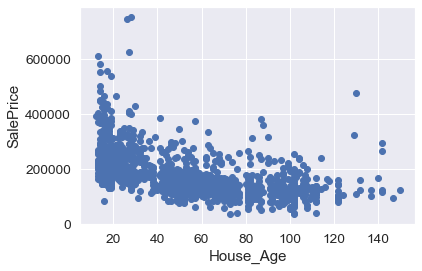

In [261]:
plt.scatter(x=housing['Age'], y=housing['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice");

### 2.6 Lets check the correlation

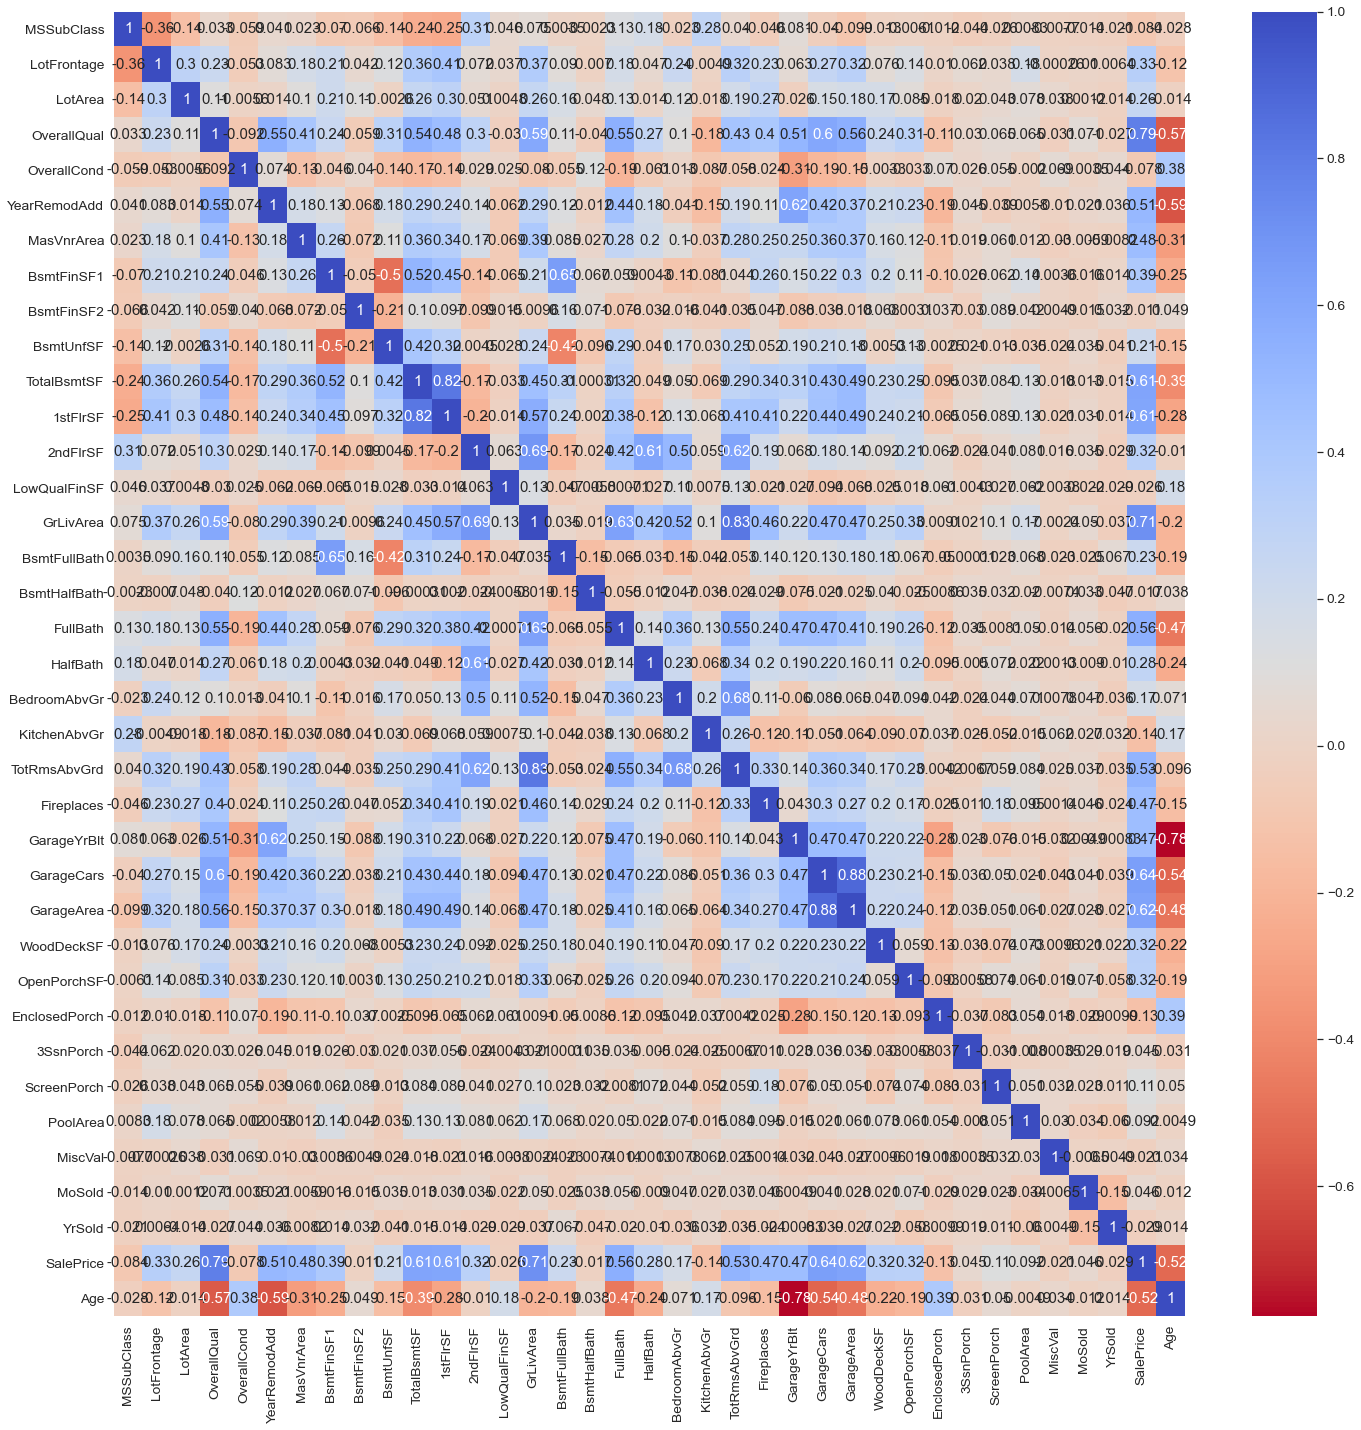

In [262]:
# Lets check the correlation matrix
plt.figure(figsize=(24, 24))
sns.heatmap(housing.corr(), annot = True , cmap = "coolwarm_r")
plt.show()

__We usually remove all those values which are having colinearity with other independent variables, but as the regularization takes care of the mutlicolinerity problem by taking the penalty, we will move on by building the model__

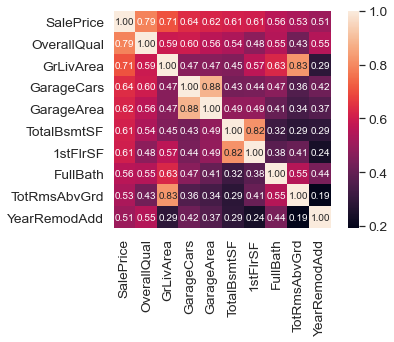

In [263]:
#top 10 correlated variable matrix
corrmat = housing.corr()
#number of variables for heatmap
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # k = 10 largest correlation values
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 3. Preparation of data for creating the model

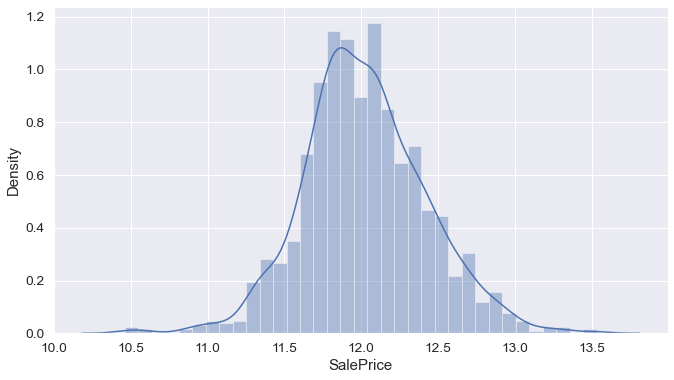

In [264]:
# Before preparing the data, let first see the distribution of Saleprice column
plt.figure(figsize=(11,6))
sns.distplot(np.log(housing["SalePrice"]))
plt.show()

## 3.1 Creating dummy variables

In [265]:
# Lets get categorical variables from the dataset into a new dataset
dum_categorical = housing.select_dtypes(include=['object'])
dum_categorical.head()

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
0       RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
1       RL      Reg       FR2      Veenker     1Fam     1Story     Gable   
2       RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
3       RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
4       RL      IR1       FR2      NoRidge     1Fam     2Story     Gable   

  Exterior1st Exterior2nd MasVnrType  ... Foundation BsmtQual BsmtExposure  \
0     VinylSd     VinylSd    BrkFace  ...      PConc       Gd           No   
1     MetalSd     MetalSd       None  ...     CBlock       Gd           Gd   
2     VinylSd     VinylSd    BrkFace  ...      PConc       Gd           Mn   
3     Wd Sdng     Wd Shng       None  ...     BrkTil       TA           No   
4     VinylSd     VinylSd    BrkFace  ...      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual Functional GarageType GarageFinish  \
0          GLQ        Ex          Gd        Typ     Attchd          RFn   
1          ALQ        Ex          TA        Typ     Attchd          RFn   
2          GLQ        Ex          Gd        Typ     Attchd          RFn   
3          ALQ        Gd          Gd        Typ     Detchd          Unf   
4          GLQ        Ex          Gd        Typ     Attchd          RFn   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 21 columns]

In [266]:
#lets convert the above categorical columns into dummies
cat_dummies = pd.get_dummies(dum_categorical, drop_first=True)
cat_dummies.head()

MSZoning_Others  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0                0            1            0             0             0   
1                0            1            0             0             0   
2                0            1            0             0             0   
3                0            1            0             0             0   
4                0            1            0             0             0   

   LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0             1                  0              0              0   
1             1                  0              1              0   
2             0                  0              0              0   
3             0                  0              0              0   
4             0                  0              1              0   

   LotConfig_Inside  ...  GarageType_BuiltIn  GarageType_Detchd  \
0                 1  ...                   0                  0   
1                 0  ...                   0                  0   
2                 1  ...                   0                  0   
3                 0  ...                   0                  1   
4                 0  ...                   0                  0   

   GarageType_NA  GarageType_Others  GarageFinish_NA  GarageFinish_RFn  \
0              0                  0                0                 1   
1              0                  0                0                 1   
2              0                  0                0                 1   
3              0                  0                0                 0   
4              0                  0                0                 1   

   GarageFinish_Unf  SaleCondition_Normal  SaleCondition_Others  \
0                 0                     1                     0   
1                 0                     1                     0   
2                 0                     1                     0   
3                 1                     0                     0   
4                 0                     1                     0   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 105 columns]

In [267]:
# Now lets drop the categorical columns which led to the creation of dummies
housing = housing.drop(list(dum_categorical.columns), axis=1)
housing.shape

(1460, 37)

In [268]:
# Now lets combine the dummies and continous column
housing = pd.concat([housing, cat_dummies], axis=1)
housing.shape

(1460, 142)

## 3.2 Train-Test Spliting

In [269]:
# Lets split the dataset into X and y datasets
X = housing.drop([ 'SalePrice'], axis=1)

y = housing['SalePrice']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

# Lets check the shape of the train and test sets
print("X - Train Shape",X_train.shape)
print("X - Test Shape",X_test.shape)
print("y - Train Shape",y_train.shape)
print("y - Test Shape",y_test.shape)

X - Train Shape (1021, 141)
X - Test Shape (439, 141)
y - Train Shape (1021,)
y - Test Shape (439,)


In [271]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1452         180         35.0     3675            5            5   
762           60         72.0     8640            7            5   
932           20         84.0    11670            9            5   
435           60         43.0    10667            7            6   
629           80         82.0     9020            6            5   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
1452          2005        80.0         547           0          0  ...   
762           2009         0.0          24           0        732  ...   
932           2006       302.0           0           0       1905  ...   
435           1996         0.0         385         344         70  ...   
629           1964       259.0         624         336        288  ...   

      GarageType_BuiltIn  GarageType_Detchd  GarageType_NA  GarageType_Others  \
1452                   0                  0              0                  1   
762                    0                  0              0                  0   
932                    0                  0              0                  0   
435                    0                  0              0                  0   
629                    0                  0              0                  0   

      GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  \
1452                0                 0                 0   
762                 0                 0                 1   
932                 0                 0                 0   
435                 0                 1                 0   
629                 0                 1                 0   

      SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
1452                     1                     0                      0  
762                      1                     0                      0  
932                      1                     0                      0  
435                      1                     0                      0  
629                      1                     0                      0  

[5 rows x 141 columns]

In [272]:
continous_cols = X_train.select_dtypes(include=['int64','float64']).columns
continous_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Age'],
      dtype='object')

## 3.3 Scaling

In [273]:
# Lets scale the numerical columns to bring the values under the range
scaler = StandardScaler()

# Scaling numericals of train dataset
X_train_scaled = scaler.fit_transform(X_train[continous_cols])
X_train_scaled


array([[ 2.88142276, -1.5238746 , -0.62408939, ..., -0.51526271,
        -1.36816708, -1.10586161],
       [ 0.06808319,  0.0820453 , -0.18586253, ..., -0.13787159,
         1.64889251, -1.23594798],
       [-0.86969667,  0.60288419,  0.08157501, ..., -1.27004495,
        -0.61390218, -1.1383832 ],
       ...,
       [-0.86969667, -0.43879358, -0.22716972, ..., -0.89265383,
        -1.36816708,  0.52021809],
       [-0.16636178, -0.65580979, -0.27394922, ..., -0.13787159,
        -0.61390218,  1.72351707],
       [ 1.47475297, -0.74261627, -0.62329502, ..., -0.13787159,
         0.89462761, -1.17090479]])

In [274]:
# Now lets add back the scaled values into the original dataset
X_train[continous_cols] = X_train_scaled
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
1452    2.881423    -1.523875 -0.624089    -0.822194    -0.508029   
762     0.068083     0.082045 -0.185863     0.636468    -0.508029   
932    -0.869697     0.602884  0.081575     2.095130    -0.508029   
435     0.068083    -1.176649 -0.006953     0.636468     0.392488   
629     0.536973     0.516078 -0.152323    -0.092863    -0.508029   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
1452      0.975231   -0.145495    0.218347   -0.280483  -1.280843  ...   
762       1.168077   -0.609643   -0.919206   -0.280483   0.362572  ...   
932       1.023443    1.142515   -0.971407   -0.280483   2.996077  ...   
435       0.541328   -0.609643   -0.134012    1.994578  -1.123686  ...   
629      -1.001438    0.893035    0.385826    1.941670  -0.634254  ...   

      GarageType_BuiltIn  GarageType_Detchd  GarageType_NA  GarageType_Others  \
1452                   0                  0              0                  1   
762                    0                  0              0                  0   
932                    0                  0              0                  0   
435                    0                  0              0                  0   
629                    0                  0              0                  0   

      GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  \
1452                0                 0                 0   
762                 0                 0                 1   
932                 0                 0                 0   
435                 0                 1                 0   
629                 0                 1                 0   

      SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
1452                     1                     0                      0  
762                      1                     0                      0  
932                      1                     0                      0  
435                      1                     0                      0  
629                      1                     0                      0  

[5 rows x 141 columns]

In [275]:
# Lets spectate the dataset once !!
X_train.describe()

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   2.240019e-17 -2.064950e-16  4.925867e-17 -2.044289e-17 -5.893642e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -8.696967e-01 -2.131520e+00 -8.337145e-01 -3.739518e+00 -4.110095e+00   
25%   -8.696967e-01 -4.387936e-01 -2.811868e-01 -8.221940e-01 -5.080290e-01   
50%   -1.663618e-01 -4.816442e-02 -1.011298e-01 -9.286292e-02 -5.080290e-01   
75%    3.025281e-01  3.858680e-01  8.422290e-02  6.364682e-01  3.924877e-01   
max    3.115868e+00  1.054223e+01  1.804976e+01  2.824462e+00  3.094037e+00   

       YearRemodAdd    MasVnrArea    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   7.011477e-16 -2.639634e-17 -4.958489e-17  1.076514e-17  8.177157e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.676398e+00 -6.096433e-01 -9.714071e-01 -2.804832e-01 -1.280843e+00   
25%   -9.050152e-01 -6.096433e-01 -9.714071e-01 -2.804832e-01 -7.801852e-01   
50%    4.449052e-01 -6.096433e-01 -1.231365e-01 -2.804832e-01 -1.964586e-01   
75%    9.270197e-01  3.766709e-01  6.033311e-01 -2.804832e-01  5.331997e-01   
max    1.216288e+00  7.385304e+00  1.130459e+01  7.172988e+00  3.963716e+00   

       ...  GarageType_BuiltIn  GarageType_Detchd  GarageType_NA  \
count  ...         1021.000000        1021.000000    1021.000000   
mean   ...            0.062684           0.269344       0.052889   
std    ...            0.242512           0.443836       0.223922   
min    ...            0.000000           0.000000       0.000000   
25%    ...            0.000000           0.000000       0.000000   
50%    ...            0.000000           0.000000       0.000000   
75%    ...            0.000000           1.000000       0.000000   
max    ...            1.000000           1.000000       1.000000   

       GarageType_Others  GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  \
count        1021.000000      1021.000000       1021.000000       1021.000000   
mean            0.024486         0.052889          0.285994          0.414300   
std             0.154627         0.223922          0.452108          0.492842   
min             0.000000         0.000000          0.000000          0.000000   
25%             0.000000         0.000000          0.000000          0.000000   
50%             0.000000         0.000000          0.000000          0.000000   
75%             0.000000         0.000000          1.000000          1.000000   
max             1.000000         1.000000          1.000000          1.000000   

       SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.824682              0.025465               0.083252  
std                0.380425              0.157611               0.276398  
min                0.000000              0.000000               0.000000  
25%                1.000000              0.000000               0.000000  
50%                1.000000              0.000000               0.000000  
75%                1.000000              0.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 141 columns]

In [276]:
# similarlly lets scale the numerical values of test dataset
X_test[continous_cols] = scaler.fit_transform(X_test[continous_cols])
X_test.shape

(439, 141)

In [277]:
# Lets spectate the test dataset once !!
X_test.describe()

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
count  4.390000e+02  4.390000e+02  4.390000e+02  4.390000e+02  4.390000e+02   
mean  -1.315071e-16 -1.770287e-18  7.586945e-17 -2.604851e-17 -1.273342e-16   
std    1.001141e+00  1.001141e+00  1.001141e+00  1.001141e+00  1.001141e+00   
min   -8.797719e-01 -2.485284e+00 -1.497753e+00 -2.868168e+00 -3.225604e+00   
25%   -8.797719e-01 -4.781826e-01 -4.381013e-01 -7.352615e-01 -5.386207e-01   
50%   -1.553833e-01 -1.500549e-02 -1.457229e-01 -2.429278e-02 -5.386207e-01   
75%    3.275425e-01  4.481716e-01  2.475244e-01  6.866759e-01  3.570403e-01   
max    3.225097e+00  5.388728e+00  1.071760e+01  2.819582e+00  3.044023e+00   

       YearRemodAdd    MasVnrArea    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF  \
count  4.390000e+02  4.390000e+02  4.390000e+02  4.390000e+02  4.390000e+02   
mean   4.105296e-15  1.289781e-17 -1.618548e-17 -1.800635e-16 -1.244259e-16   
std    1.001141e+00  1.001141e+00  1.001141e+00  1.001141e+00  1.001141e+00   
min   -1.720356e+00 -5.069802e-01 -9.773144e-01 -3.083774e-01 -1.292795e+00   
25%   -8.377271e-01 -5.069802e-01 -9.773144e-01 -3.083774e-01 -7.776610e-01   
50%    3.881469e-01 -5.069802e-01 -1.381286e-01 -3.083774e-01 -2.117062e-01   
75%    9.275314e-01  2.400082e-01  5.679064e-01 -3.083774e-01  5.679254e-01   
max    1.221741e+00  7.568569e+00  3.919055e+00  7.783212e+00  3.680677e+00   

       ...  GarageType_BuiltIn  GarageType_Detchd  GarageType_NA  \
count  ...          439.000000         439.000000     439.000000   
mean   ...            0.054670           0.255125       0.061503   
std    ...            0.227594           0.436429       0.240526   
min    ...            0.000000           0.000000       0.000000   
25%    ...            0.000000           0.000000       0.000000   
50%    ...            0.000000           0.000000       0.000000   
75%    ...            0.000000           1.000000       0.000000   
max    ...            1.000000           1.000000       1.000000   

       GarageType_Others  GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  \
count         439.000000       439.000000        439.000000        439.000000   
mean            0.020501         0.061503          0.296128          0.414579   
std             0.141869         0.240526          0.457069          0.493211   
min             0.000000         0.000000          0.000000          0.000000   
25%             0.000000         0.000000          0.000000          0.000000   
50%             0.000000         0.000000          0.000000          0.000000   
75%             0.000000         0.000000          1.000000          1.000000   
max             1.000000         1.000000          1.000000          1.000000   

       SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
count            439.000000            439.000000             439.000000  
mean               0.810934              0.022779               0.091116  
std                0.392008              0.149369               0.288103  
min                0.000000              0.000000               0.000000  
25%                1.000000              0.000000               0.000000  
50%                1.000000              0.000000               0.000000  
75%                1.000000              0.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 141 columns]

#  4. Model Building

##  4.1 Ridge Regression

__<font color="red">Note:- In sklearn, the <font color="blue">"lambda"</font> from the equation used to calculate the penalty value for lasso and ridge regressions is named as <font color="green">"alpha"</font> in sklearn package</font>__

In [278]:
# list of alphas (lambda values) to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30 , 40, 50, 
60, 70, 80, 90, 100, 200, 300, 400, 500, 1000 ]}


ridge = Ridge()

# k _cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30, 40,
                                   50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [279]:
# Now lets check the Cross validation results 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.010830      0.004664         0.004409        0.003673      0.0001   
1       0.011201      0.003919         0.003200        0.003919       0.001   
2       0.006395      0.003197         0.003200        0.003920        0.01   
3       0.009600      0.003200         0.004800        0.003919        0.05   
4       0.009900      0.003107         0.006402        0.003201         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19787.276602      -21388.390797      -19883.702221   
1   {'alpha': 0.001}      -19787.072381      -21388.077779      -19883.125022   
2    {'alpha': 0.01}      -19785.022478      -21385.085247      -19877.277222   
3    {'alpha': 0.05}      -19776.431482      -21374.263665      -19846.976959   
4     {'alpha': 0.1}      -19767.175773      -21364.761808      -19803.633481   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -20114.932108  ...    -20190.537479      611.098203               34   
1      -20113.450630  ...    -20189.747262      611.282766               33   
2      -20099.222112  ...    -20181.988824      613.187095               32   
3      -20047.493864  ...    -20149.877642      622.803848               31   
4      -20000.011795  ...    -20114.342322      635.983203               30   

   split0_train_score  split1_train_score  split2_train_score  \
0       -16422.320409       -13647.620863       -16965.512725   
1       -16422.157053       -13647.537712       -16965.368228   
2       -16420.514902       -13647.827992       -16963.901941   
3       -16413.229930       -13649.447458       -16957.158703   
4       -16404.437653       -13652.159815       -16948.543796   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -16859.477775       -17393.150691     -16257.616493      1341.044113  
1       -16859.259160       -17392.855243     -16257.435480      1340.987555  
2       -16857.205438       -17390.053670     -16255.900788      1340.020686  
3       -16848.796611       -17378.245506     -16249.375642      1335.745808  
4       -16839.108898       -17365.226615     -16241.895356      1330.491587  

[5 rows x 21 columns]

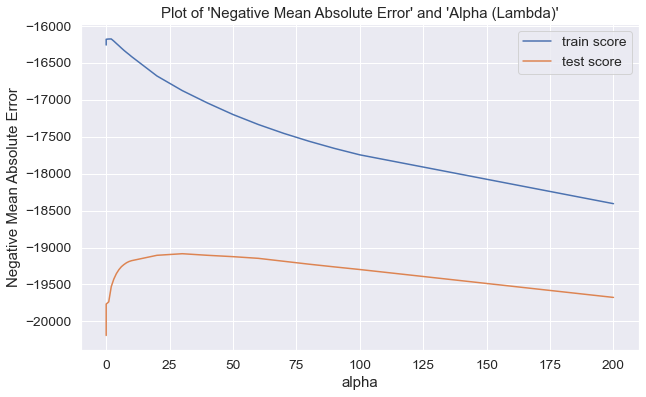

In [280]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Plot of 'Negative Mean Absolute Error' and 'Alpha (Lambda)'")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

__To find the best estimator__

In [281]:
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Ridge(alpha=30)
{'alpha': 30}


### 4.1.1 Lets build the final model

In [282]:
# From the best estimator lets build the final model with alpha = 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


# Lets check the coefficients
ridge.coef_

array([-7.82696617e+03, -3.57630988e+03,  4.19566803e+03,  1.69180733e+04,
        4.97752476e+03,  2.54949828e+03,  2.17496704e+03,  3.11042446e+02,
       -2.39508304e+02,  6.90060432e+02,  9.25773668e+02,  2.98764098e+03,
        1.07770455e+04,  4.04081818e+02,  1.11776017e+04,  4.93557534e+03,
       -7.70932953e+01,  5.06068451e+03,  2.21296265e+03, -2.56928607e+03,
       -2.99108742e+03,  7.04479380e+03,  3.93101167e+03,  1.35718243e+01,
        1.08676084e+04, -1.78101917e+02,  2.15930920e+03, -1.67809405e+03,
        3.00202545e+02,  1.84115870e+03,  3.81662997e+03,  8.15339976e+02,
       -1.20909478e+03,  2.39649642e+02,  1.71570968e+02, -7.43386627e+03,
       -3.62969264e+03, -2.89068165e+02, -4.64558430e+03,  3.76244258e+03,
       -1.00577331e+04,  1.16354348e+02,  7.41976861e+03, -5.88037761e+03,
       -3.01252625e+03, -5.08177026e+02, -4.80195823e+02,  1.33173966e+03,
        3.81373647e+03, -3.46766265e+02, -5.16196372e+03,  1.17482819e+04,
       -1.27366483e+04, -

In [283]:
# Lets check the train score
print(ridge.score(X_train,y_train))
# lets check the test score
print(ridge.score(X_test,y_test))

0.8697213553138227
0.8731070042562249


__Best estimator comes out to be alpha = 20 (from the graph too!!), when we built model using ridge regression__

In [284]:
# predicting the values using rigde model using the best estimator = 20
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 2) for x in model_parameters] # rounding of the coeff into 2 decimals
cols = X.columns
cols = cols.insert(0, "constant")

# columns with its respective coefficients
list(zip(cols, model_parameters))

0.8697213553138227
0.8731070042562249


[('constant', 186233.19),
 ('MSSubClass', -7826.97),
 ('LotFrontage', -3576.31),
 ('LotArea', 4195.67),
 ('OverallQual', 16918.07),
 ('OverallCond', 4977.52),
 ('YearRemodAdd', 2549.5),
 ('MasVnrArea', 2174.97),
 ('BsmtFinSF1', 311.04),
 ('BsmtFinSF2', -239.51),
 ('BsmtUnfSF', 690.06),
 ('TotalBsmtSF', 925.77),
 ('1stFlrSF', 2987.64),
 ('2ndFlrSF', 10777.05),
 ('LowQualFinSF', 404.08),
 ('GrLivArea', 11177.6),
 ('BsmtFullBath', 4935.58),
 ('BsmtHalfBath', -77.09),
 ('FullBath', 5060.68),
 ('HalfBath', 2212.96),
 ('BedroomAbvGr', -2569.29),
 ('KitchenAbvGr', -2991.09),
 ('TotRmsAbvGrd', 7044.79),
 ('Fireplaces', 3931.01),
 ('GarageYrBlt', 13.57),
 ('GarageCars', 10867.61),
 ('GarageArea', -178.1),
 ('WoodDeckSF', 2159.31),
 ('OpenPorchSF', -1678.09),
 ('EnclosedPorch', 300.2),
 ('3SsnPorch', 1841.16),
 ('ScreenPorch', 3816.63),
 ('PoolArea', 815.34),
 ('MiscVal', -1209.09),
 ('MoSold', 239.65),
 ('YrSold', 171.57),
 ('Age', -7433.87),
 ('MSZoning_Others', -3629.69),
 ('MSZoning_RL', -28

In [285]:
# Important features with postive coefficents
z = list(zip(cols, model_parameters))
z = pd.DataFrame(z,columns=["names","values"])
y = z[z["values"] > 0 ].sort_values(by="values")
y.head()

names  values
59  Neighborhood_NPkVill    8.59
24           GarageYrBlt   13.57
42          LotShape_Reg  116.35
35                YrSold  171.57
34                MoSold  239.65

In [286]:
# Important features with negative coefficents
z = list(zip(cols, model_parameters))
z = pd.DataFrame(z,columns=["names","values"])
y = z[z["values"] < 0 ].sort_values(by="values",ascending=False)
y.head()

names  values
17         BsmtHalfBath  -77.09
132  GarageType_BuiltIn -100.22
117    BsmtFinType1_Rec -155.58
26           GarageArea -178.10
9            BsmtFinSF2 -239.51

##  4.2 Lasso Regression

In [287]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30 , 40, 50, 
60, 70, 80, 90, 100, 200, 300, 400, 500, 1000 ]}

lasso = Lasso()

folds = 5
model_cv = GridSearchCV(estimator=lasso,
            param_grid=params,
            cv= folds,
            n_jobs = True,scoring="neg_mean_absolute_error",
            return_train_score=True, verbose = 1
            )

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 37 candidates, totalling 185 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=True,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30, 40,
                                   50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [288]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.090202      0.008351         0.003200        0.003919      0.0001   
1       0.091259      0.006445         0.003201        0.003921       0.001   
2       0.102624      0.012697         0.003200        0.003920        0.01   
3       0.105593      0.003189         0.003207        0.003928        0.05   
4       0.102094      0.004852         0.006398        0.003199         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -19787.498146      -21388.031068      -19885.890355   
1   {'alpha': 0.001}      -19787.495211      -21388.027795      -19885.877506   
2    {'alpha': 0.01}      -19787.465841      -21388.018036      -19885.749016   
3    {'alpha': 0.05}      -19787.334802      -21387.964516      -19885.221371   
4     {'alpha': 0.1}      -19787.169349      -21387.970348      -19884.569287   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -20113.709049  ...    -20190.732717      610.719241               36   
1      -20113.638274  ...    -20190.703665      610.728896               35   
2      -20112.927857  ...    -20190.417198      610.834590               34   
3      -20109.780358  ...    -20189.153138      611.296887               33   
4      -20105.877013  ...    -20187.595332      611.905014               32   

   split0_train_score  split1_train_score  split2_train_score  \
0       -16422.282485       -13647.543856       -16965.606087   
1       -16422.275323       -13647.542447       -16965.598318   
2       -16422.203712       -13647.566475       -16965.520628   
3       -16421.885578       -13647.722861       -16965.175339   
4       -16421.488371       -13647.958659       -16964.743702   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -16859.443409       -17393.185178     -16257.612203      1341.085769  
1       -16859.436504       -17393.171610     -16257.604841      1341.082404  
2       -16859.363371       -17393.035977     -16257.538033      1341.033556  
3       -16859.040522       -17392.438507     -16257.252562      1340.798257  
4       -16858.638294       -17391.706728     -16256.907151      1340.491122  

[5 rows x 21 columns]

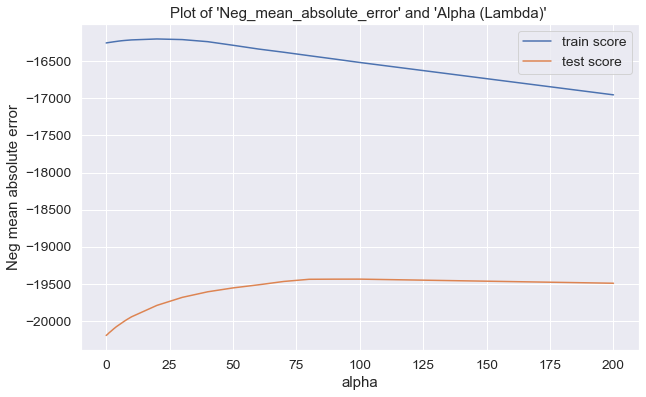

In [289]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg mean absolute error')
plt.title("Plot of 'Neg_mean_absolute_error' and 'Alpha (Lambda)' ")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

__To find the best estimator__

In [290]:
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Lasso(alpha=100)
{'alpha': 100}


### 4.2.1 Lets build the final model

In [291]:
# From the best estimator lets build the final model with alpha = 100
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [292]:
lasso.coef_

array([-9.35988909e+03, -3.59411665e+03,  4.59827939e+03,  1.52588245e+04,
        5.16056711e+03,  2.33918344e+03,  0.00000000e+00, -0.00000000e+00,
       -2.74360022e+02,  5.43164562e+02,  0.00000000e+00,  0.00000000e+00,
        7.15503125e+03,  0.00000000e+00,  1.47255138e+04,  4.54318975e+03,
        4.37617276e+00,  5.40873959e+03,  2.18367007e+03, -1.72463177e+03,
       -3.14632297e+03,  6.84992206e+03,  4.06005215e+03,  1.64122002e+01,
        9.83935594e+03, -4.92829907e+01,  1.93569197e+03, -1.35255995e+03,
        7.87570064e+00,  1.95818274e+03,  3.61482460e+03,  1.00005043e+03,
       -1.02744395e+03,  0.00000000e+00,  1.51570547e+02, -7.38680000e+03,
       -1.80847360e+03,  0.00000000e+00, -5.78751337e+02,  3.58548741e+03,
       -1.98572305e+04,  3.27861549e+02,  7.73500268e+03, -7.12011529e+03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.37465611e+03,  0.00000000e+00,  3.95182656e+02,  2.12011702e+04,
       -1.11030069e+04, -

In [293]:
lasso.score(X_train,y_train)

0.877626314184331

In [294]:
lasso.score(X_test,y_test)

0.8752208691583175

__Best estimator comes out to be alpha = 100 (from the graph too!!), when we built model using lasso regression__

In [295]:
# predict
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

0.877626314184331
0.8752208691583175


[('constant', 184348.237),
 ('MSSubClass', -9359.889),
 ('LotFrontage', -3594.117),
 ('LotArea', 4598.279),
 ('OverallQual', 15258.824),
 ('OverallCond', 5160.567),
 ('YearRemodAdd', 2339.183),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', -274.36),
 ('BsmtUnfSF', 543.165),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 7155.031),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 14725.514),
 ('BsmtFullBath', 4543.19),
 ('BsmtHalfBath', 4.376),
 ('FullBath', 5408.74),
 ('HalfBath', 2183.67),
 ('BedroomAbvGr', -1724.632),
 ('KitchenAbvGr', -3146.323),
 ('TotRmsAbvGrd', 6849.922),
 ('Fireplaces', 4060.052),
 ('GarageYrBlt', 16.412),
 ('GarageCars', 9839.356),
 ('GarageArea', -49.283),
 ('WoodDeckSF', 1935.692),
 ('OpenPorchSF', -1352.56),
 ('EnclosedPorch', 7.876),
 ('3SsnPorch', 1958.183),
 ('ScreenPorch', 3614.825),
 ('PoolArea', 1000.05),
 ('MiscVal', -1027.444),
 ('MoSold', 0.0),
 ('YrSold', 151.571),
 ('Age', -7386.8),
 ('MSZoning_Others', -1808.474),
 ('MSZoning_RL', 

## 4.3 Error distribution

In [296]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)
#y_pred_ridge_test = ridge.predict(X_test)

Error distribution in train dataset


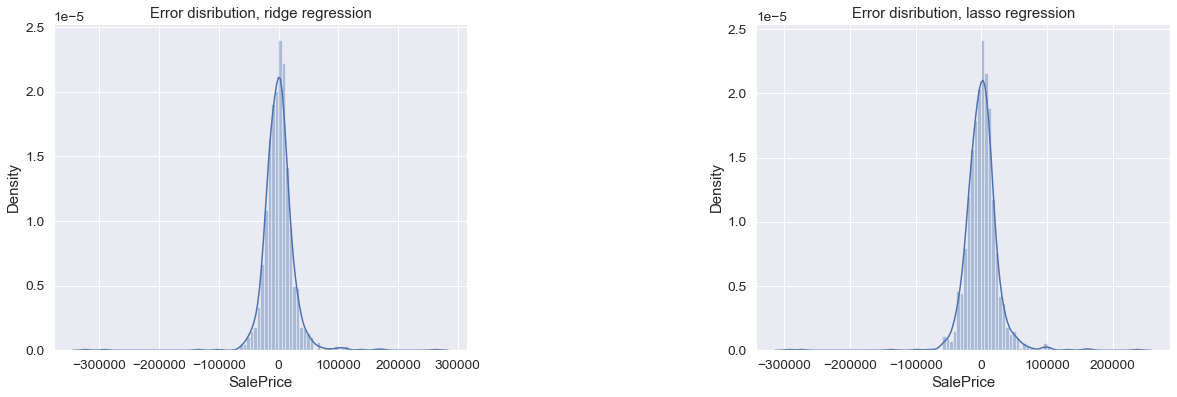

In [297]:
print('Error distribution in train dataset')
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = 0.7)

In [298]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8697213553138227
r2_score for lasso: 0.877626314184331


In [299]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


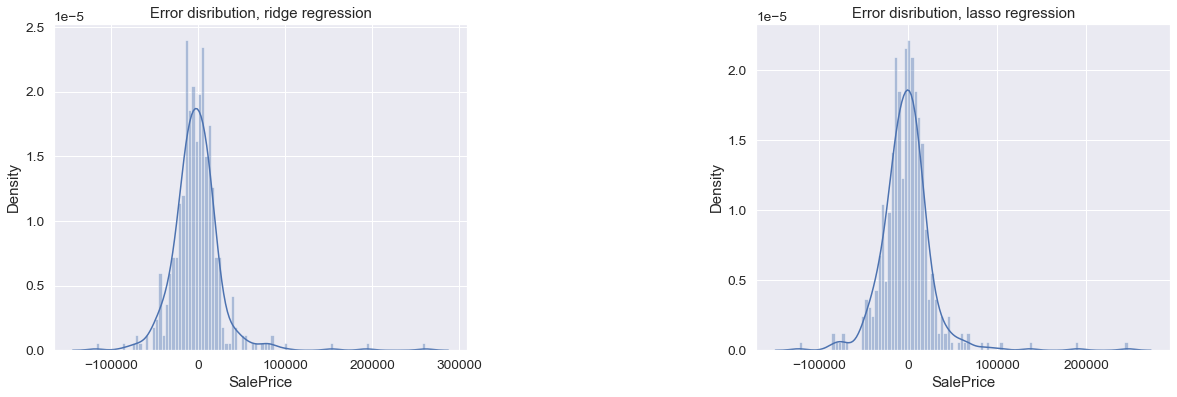

In [300]:
print('Error distribution in test dataset')
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = 0.7)

In [301]:
print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.88


In [302]:
# Important features with postive coefficents
z = list(zip(cols, model_parameters))
z = pd.DataFrame(z,columns=["names","values"])
y = z[z["values"] > 0 ].sort_values(by="values")
y.head()

names   values
17      BsmtHalfBath    4.376
136  GarageFinish_NA    7.552
29     EnclosedPorch    7.876
24       GarageYrBlt   16.412
35            YrSold  151.571

In [303]:
# Important features with negative coefficents
z = list(zip(cols, model_parameters))
z = pd.DataFrame(z,columns=["names","values"])
y = z[z["values"] < 0 ].sort_values(by="values",ascending=False)
y.head()

names   values
26            GarageArea  -49.283
135    GarageType_Others -145.762
9             BsmtFinSF2 -274.360
122         HeatingQC_TA -328.024
83   Exterior1st_MetalSd -437.832

# Conclusion

### The score of Ridge and Lasso regressions created are almost the same. It is would be better for us to choose Lasso regression over Ridge in this case, as Lasso comes up with an added advantage of feature elimnation also
- We got a decent score for both Ridge and Lasso regression.
    - Ridge : Train :86.9 Test :87
    - Lasso : Train :87.7 Test : 88
    
- These varibales are directly proportional to each other.
    - Optimal Value of lamda for ridge : 20
    - Optimal Value of lamda for Lasso : 100
    
- We can see that there are many feature/ factors which are negative which corresponds to decreasing the saleprice. Hence company can make point on these factors and take the properties at lower price.

#### Ridge Regression

Important features with postive coefficients
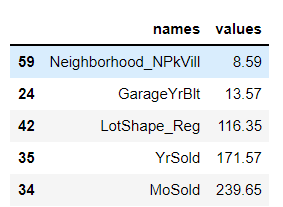
Important features with negative coefficients
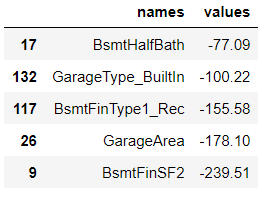

#### Lasso Regression

Important features with postive coefficients
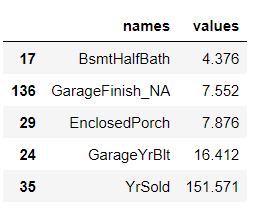  
Important features with negative coefficients
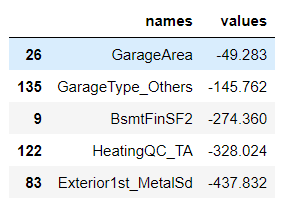